### import

In [24]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ROOT
import ctypes
import math
try:
#     plt.style.use('belle2')
    plt.style.use('belle2_serif')
#     plt.style.use('belle2_modern')
except OSError:
    print("Please install belle2 matplotlib style")   
px = 1/plt.rcParams['figure.dpi']

from main.data_tools.extract_ntuples import get_pd, get_np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 2D

In [25]:
#base_file_loc = '/media/jykim/T7/storage/01_recon/new_sigext_cuts_skim_1ab_inv_bkg_sig/'
# base_file_loc = '/media/jykim/T7/storage/01_recon/trainv2new_pi0veto/'
base_file_loc = '/media/jykim/T7/storage/01_recon/trainv2new_400invfb/'

base_file_loc = '/media/jykim/T7/storage/01_recon/trainv2new_sig_extract_400fb/'
base_file_loc = '/media/jykim/T7/storage/01_recon/trainv2_new_correct_data_sig_ext_sig_bkg/'
base_file_loc =  '/media/jykim/T7/storage/01_recon/train_v6_beambkg_sig_ext/'
base_file_loc =  '/media/jykim/T7/storage/01_recon/v6_pre_ext_omega_const_wide_Q/'


# phigamma_ccbar = base_file_loc + 'topo/skim_1abinv_phi_D0_M/topoana.root'
phigamma_ccbar = base_file_loc + 'ccbar/recon_udst_*.root'
phigamma_uubar = base_file_loc + 'uubar/recon_udst_*.root'
phigamma_ddbar = base_file_loc + 'ddbar/recon_udst_*.root'
phigamma_ssbar = base_file_loc + 'ssbar/recon_udst_*.root'
phigamma_charged = base_file_loc + 'charged/recon_udst_*.root'
phigamma_mixed = base_file_loc + 'mixed/recon_udst_*.root'
phigamma_taupair = base_file_loc + 'taupair/recon_udst_*.root'

base_filter=' Pi0_Prob<0.85 && Pis_charge==+1 && D0_M>1.67 && D0_M<2.06 '
base_filter=' phi_rank_Dstp==1 && Dstarp_CMS_p>2.49 && Pi0_Prob<0.9  && D0_M>1.67 && D0_M<2.06 && abs(D0_cosHel_0)<=1'

# base_filter=' Pi0_Prob<0.90 && Pis_charge==-1 && D0_M>1.72 && D0_M<2.01 '

#base_filter='Pi0_Prob<0.90  && D0_M>1.67 && D0_M<2.06 '

# base_filter='Pi0_Prob<0.95 && phi_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06'

#ccbar_filter='Pi0_Prob<0.9 && Pis_charge==1 && D0_M>1.67 && D0_M<2.06 && (iCascDcyBrP_Dst_0 !=1 && iCascDcyBrP_Dst_0 !=2)'
# ccbar_filter='Pi0_Prob<0.9 && Pis_charge==1 && D0_M>1.67 && D0_M<2.06 '


#ccbar_filter='Pi0_Prob<0.9 && D0_M>1.67 && D0_M<2.06 && (iCascDcyBrP_D0_0 !=0 ) && (phi_rank_Dstp ==1)'

variables=['D0_M','D0_cosHel_0']
tree='phi'

In [26]:
# pd_phigamma_ccbar = get_pd(file=phigamma_ccbar, tree=tree,base_filter=base_filter,variables=topo_variables)
pd_phigamma_ccbar = get_pd(file=phigamma_ccbar, tree=tree,base_filter=base_filter,variables=variables)

pd_phigamma_uubar = get_pd(file=phigamma_uubar, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_ddbar = get_pd(file=phigamma_ddbar, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_ssbar = get_pd(file=phigamma_ssbar, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_charged = get_pd(file=phigamma_charged, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_mixed = get_pd(file=phigamma_mixed, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_taupair = get_pd(file=phigamma_taupair, tree=tree,base_filter=base_filter,variables=variables)

In [27]:
phigamma_generic=pd.concat([pd_phigamma_ccbar,
                           pd_phigamma_uubar,
                           pd_phigamma_ddbar,
                           pd_phigamma_ssbar,
                           pd_phigamma_charged,
                           pd_phigamma_mixed,
                           pd_phigamma_taupair],ignore_index=True)

In [109]:
#np_phigamma_generic_D0_M  = phigamma_generic['D0_M'].to_numpy()

550


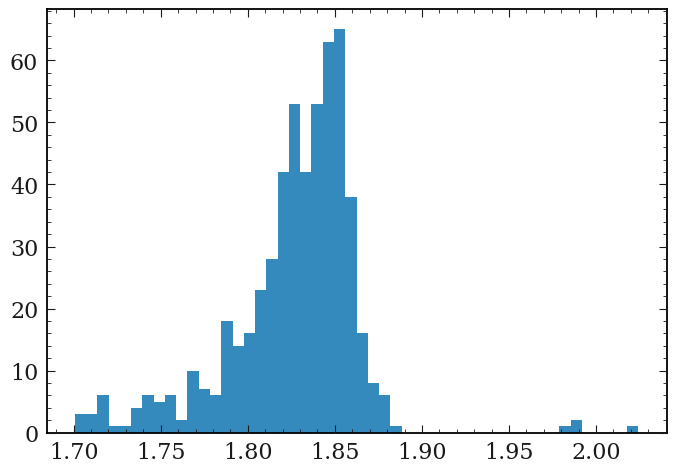

In [12]:
topo_ccbar = '/media/jykim/T7/storage/01_recon/trainv2new_pi0veto/topo/topo_phi_D0_M/topoana.root'
topo_ccbar = '/media/jykim/T7/storage/01_recon/trainv2_new_correct_data_sig_ext_sig_bkg/topo/topo_phi_D0_M/topoana.root'

signal_filter='Pi0_Prob<0.85 && Pis_charge==1 && D0_M>1.7 && D0_M<2.03 && ( iCascDcyBrP_Dst_0 ==1)'
topo_variables=['D0_M','D0_cosHel_0','iCascDcyBrP_Dst_0']
signal_ccbar = get_pd(file=topo_ccbar, tree=tree,base_filter=signal_filter,variables=topo_variables)
plt.hist(signal_ccbar.D0_M,bins=50);
print(len(signal_ccbar))

131


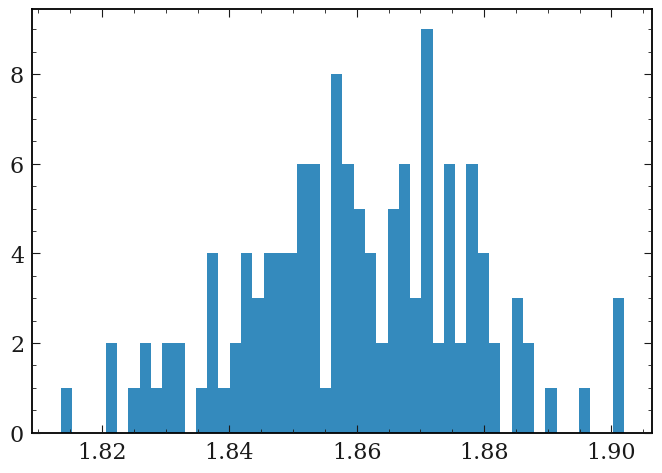

In [56]:
topo_ccbar = '/media/jykim/T7/storage/01_recon/trainv2new_pi0veto/topo/topo_phi_D0_M/topoana.root'
topo_ccbar = '/media/jykim/T7/storage/01_recon/trainv2new_sig_extract_400fb/topo/topo_phi_D0_M/topoana.root'
topo_ccbar = '/media/jykim/T7/storage/01_recon/trainv2_new_correct_data_sig_ext_sig_bkg/topo/topo_phi_D0_M/topoana.root'

signal_filter='Pi0_Prob<0.85 && Pis_charge==1 && D0_M>1.8 && D0_M<2.03 && ( iCascDcyBrP_Dst_0 ==2)'
topo_variables=['D0_M','D0_cosHel_0','iCascDcyBrP_Dst_0']
signal_ccbar = get_pd(file=topo_ccbar, tree=tree,base_filter=signal_filter,variables=topo_variables)
plt.hist(signal_ccbar.D0_M,bins=50);
print(len(signal_ccbar))

In [162]:
signal_filter='Pi0_Prob<0.9 && Pis_charge==1 && D0_M>1.7 && D0_M<2.03 && ( iCascDcyBrP_Dst_0 !=0 && iCascDcyBrP_Dst_0 !=1)'
topo_variables=['D0_M','D0_cosHel_0','iCascDcyBrP_Dst_0']
signal_ccbar = get_pd(file=topo_ccbar, tree=tree,base_filter=signal_filter,variables=topo_variables)
signal_ccbar.describe()
plt.hist(signal_ccbar.D0_M,bins=50);

SegmentationViolation: Could not instantiate Take<Int_t>:
  none of the 2 overloaded methods succeeded. Full details:
  ROOT::RDF::RResultPtr<vector<int> > ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager,void>::Take(basic_string_view<char,char_traits<char> > column = "") =>
    SegmentationViolation: segfault in C++; program state was reset
  ROOT::RDF::RResultPtr<vector<int> > ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager,void>::Take(basic_string_view<char,char_traits<char> > column = "") =>
    SegmentationViolation: segfault in C++; program state was reset
  none of the 3 overloaded methods succeeded. Full details:
  ROOT::RDF::RResultPtr<vector<int> > ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager,void>::Take(basic_string_view<char,char_traits<char> > column = "") =>
    SegmentationViolation: segfault in C++; program state was reset
  ROOT::RDF::RResultPtr<vector<int> > ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager,void>::Take(basic_string_view<char,char_traits<char> > column = "") =>
    SegmentationViolation: segfault in C++; program state was reset
  ROOT::RDF::RResultPtr<vector<int> > ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager,void>::Take(basic_string_view<char,char_traits<char> > column = "") =>
    SegmentationViolation: segfault in C++; program state was reset

 *** Break *** segmentation violation



There was a crash.
This is the entire stack trace of all threads:

Thread 24 (Thread 0x7f2595ffb640 (LWP 1717104) "ZMQbg/IO/0"):
#0  0x00007f26034defde in epoll_wait (epfd=61, events=0x7f2595ffa150, maxevents=256, timeout=-1) at ../sysdeps/unix/sysv/linux/epoll_wait.c:30
#1  0x00007f26017f41ab in ?? () from /home/jykim/.local/lib/python3.10/site-packages/zmq/backend/cython/../../../pyzmq.libs/libzmq-fc4fcd2d.so.5.2.4
#2  0x00007f2601814815 in ?? () from /home/jykim/.local/lib/python3.10/site-packages/zmq/backend/cython/../../../pyzmq.libs/libzmq-fc4fcd2d.so.5.2.4
#3  0x00007f260183caac in ?? () from /home/jykim/.local/lib/python3.10/site-packages/zmq/backend/cython/../../../pyzmq.libs/libzmq-fc4fcd2d.so.5.2.4
#4  0x00007f260344db43 in start_thread (arg=<optimized out>) at ./nptl/pthread_create.c:442
#5  0x00007f26034dfa00 in clone3 () at ../sysdeps/unix/sysv/linux/x86_64/clone3.S:81

Thread 23 (Thread 0x7f25957fa640 (LWP 1717103) "ZMQbg/Reaper")

In [ ]:
n = 10
signal_ccbar['iCascDcyBrP_Dst_0'].value_counts()[:n].index.tolist()

In [151]:
# signal_ccbar.loc[signal_ccbar['iCascDcyBrP_Dst_0'] == signal_ccbar['iCascDcyBrP_Dst_0'].max()] 

286


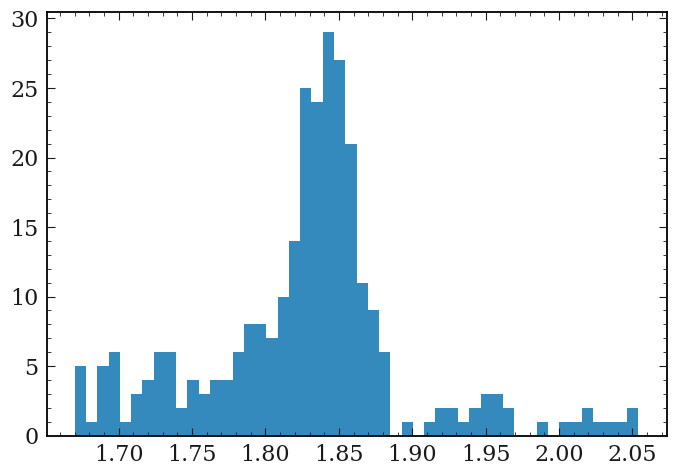

In [12]:
file = '/media/jykim/T7/storage_b2/storage/p13_test/skim_p13_test/output_all.root'
base_filter='Pis_charge==-1 && D0_M>1.67 && D0_M<2.06 && Pi0_Prob<0.8'
topo_variables=['D0_M','D0_cosHel_0']
tree='phi'
phigamma_generic = get_pd(file=file, tree=tree,base_filter=base_filter ,variables=topo_variables)
plt.hist(phigamma_generic.D0_M,bins=50);
print(len(phigamma_generic))

9285


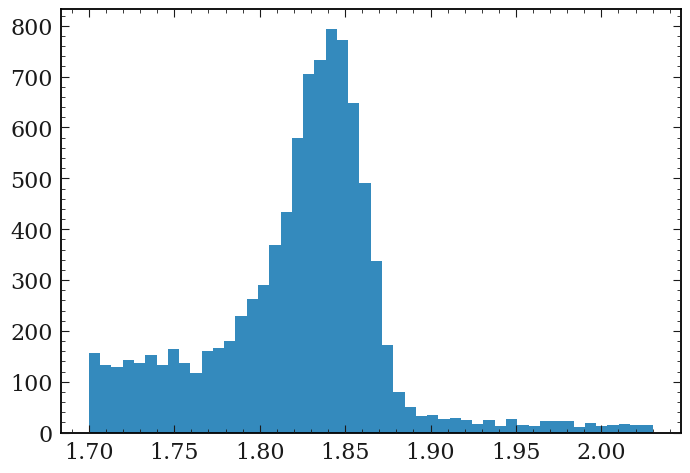

In [22]:
file = '/media/jykim/T7/storage_b2/storage/p13_test/skim_p13_test/output_all.root'
base_filter='Pis_charge==1 && D0_M>1.7 && D0_M<2.03 && Pi0_Prob<0.8 '
topo_variables=['D0_M','D0_cosHel_0']
tree='antiKstar'
phigamma_generic = get_pd(file=file, tree=tree,base_filter=base_filter ,variables=topo_variables)
plt.hist(phigamma_generic.D0_M,bins=50);
print(len(phigamma_generic))

3365


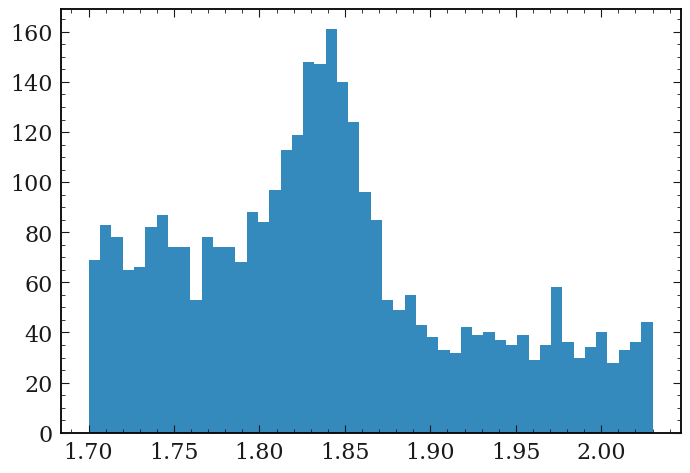

In [23]:
file = '/media/jykim/T7/storage_b2/storage/p13_test/skim_p13_test/output_all.root'
base_filter='rho_rank_Dstp==1 && D0_M>1.7 && D0_M<2.03 && Pi0_Prob<0.8'
topo_variables=['D0_M','D0_cosHel_0']
tree='rho'
phigamma_generic = get_pd(file=file, tree=tree,base_filter=base_filter ,variables=topo_variables)
plt.hist(phigamma_generic.D0_M,bins=50);
print(len(phigamma_generic))

2323


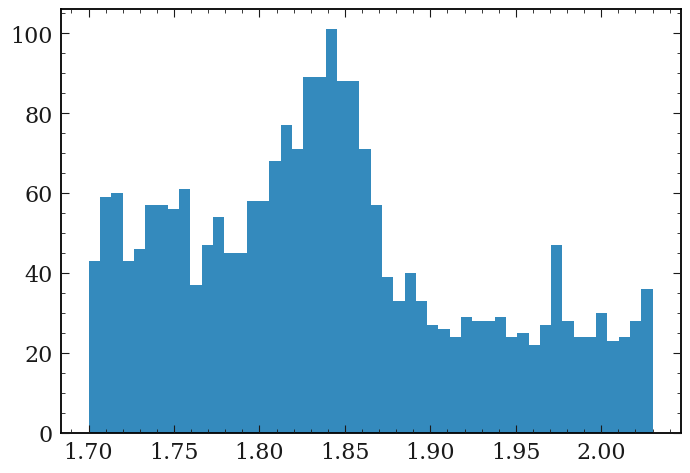

In [131]:
file = '/media/jykim/T7/storage_b2/storage/p13_test/skim_p13_test/output_all.root'
base_filter='rho_rank_Dstp==1 && D0_M>1.7 && D0_M<2.03 && Pi0_Prob<0.8 && abs(D0_cosHel_0)< 0.8'
topo_variables=['D0_M','D0_cosHel_0']
tree='rho'
phigamma_generic = get_pd(file=file, tree=tree,base_filter=base_filter ,variables=topo_variables)
plt.hist(phigamma_generic.D0_M,bins=50);
print(len(phigamma_generic))

1936


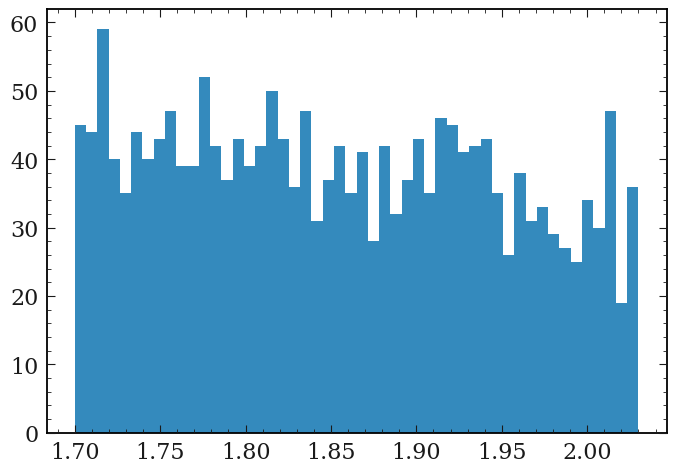

In [133]:
file = '/media/jykim/T7/storage_b2/storage/p13_test/skim_p13_test/output_all.root'
base_filter='omega_rank_Dstp==1 && D0_M>1.7 && D0_M<2.03 && Pi0_Prob<0.8 && abs(boosted_cos_hel)<0.9'
base_filter='omega_rank_Dstp==1 && D0_M>1.7 && D0_M<2.03 '

topo_variables=['D0_M','D0_cosHel_0']
tree='omega'
phigamma_generic = get_pd(file=file, tree=tree,base_filter=base_filter ,variables=topo_variables)
plt.hist(phigamma_generic.D0_M,bins=50);
print(len(phigamma_generic))

In [28]:
D0_M_pd_data = phigamma_generic['D0_M']
D0_cosHel_0_pd_data = phigamma_generic['D0_cosHel_0']

D0_M_np_data = D0_M_pd_data.to_numpy()
D0_cosHel_0_np_data = D0_cosHel_0_pd_data.to_numpy()

In [29]:
#ROOT.RooClassFactory.makePdf("MyPdf_xsquared_nopara", "x", "", "x*x")
ROOT.gROOT.ProcessLineSync(".x MyPdf_xsquared_nopara.cxx+")

94133501583776

(MyPdf_xsquared_nopara) An instance of MyPdf_xsquared_nopara.


Info in <ACLiC>: unmodified script has already been compiled and loaded


In [30]:
#ROOT.RooClassFactory.makePdf("MyPdf_one_minus_squared", "y", "", "1-y*y")
ROOT.gROOT.ProcessLineSync(".x MyPdf_one_minus_squared.cxx+")

94133502329040

(MyPdf_one_minus_squared) An instance of MyPdf_one_minus_squared.


Info in <ACLiC>: unmodified script has already been compiled and loaded


[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:NumericIntegration -- RooRealIntegral::init(y_sig_model_Int[cos#theta_{H}]) using numeric integrator RooIntegrator1D to calculate Int(cos#theta_{H})
[#1] INFO:NumericIntegration -- RooRealIntegral::init(y_bkg1_model_Int[cos#theta_{H}]) using numeric integrator RooIntegrator1D to calculate Int(cos#theta_{H})
[#1] INFO:NumericIntegration -- RooRealIntegral::init(y_bkg3_model_Int[cos#theta_{H}]) using numeric integrator RooIntegrator1D to calculate Int(cos#theta_{H})
[#1] INFO:Eval -- RooAbsTestStatistic::initMPMode: started 12 remote server process.
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 nbkg1        6.00000e+02  1.81600e+02    0.00000e+00  1.81600e+03
     2 nbkg2        3.00000e+02  1.50000e+02    0.00000e+00  1.81600e+03
     3 nbkg3 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas
Info in <TCanvas::Print>: png file test2_x_D0.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas
Info in <TCanvas::Print>: png file test2_y_D0.png has been created


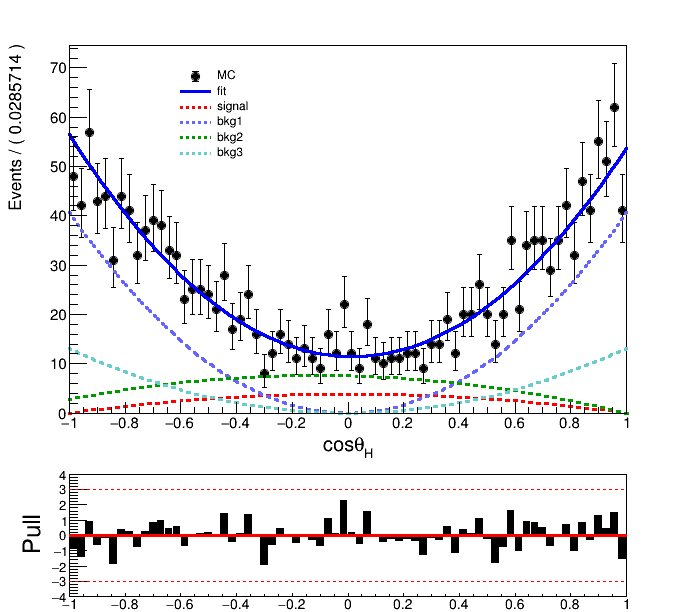

In [35]:
file1_name="test2_x_D0.png"
file2_name="test2_y_D0.png"


####################
#D0_M
x = ROOT.RooRealVar("M(D^{0})", "M(D^{0}) [GeV/c^{2}]", 1.67, 2.06, "")
# x = ROOT.RooRealVar("M(D^{0})", "M(D^{0}) [GeV/c^{2}]", 1.72, 2.01, "")

x.setBins(70)

#### Construct signal model for x
x_sig_mean = ROOT.RooRealVar("x_sig_mean", "mean of gaussians", 1.863,1.86, 1.88)
x_sig_sigma1 = ROOT.RooRealVar("x_sig_sigma1", "width of gaussians", 0.03,0,0.03)
x_sig_sigma2 = ROOT.RooRealVar("x_sig_sigma2", "width of gaussians", 0.01,0.005,0.02)
#x_sig_sigma3 = ROOT.RooRealVar("x_sig_sigma3", "width of gaussians", 0.03,0,0.7)

x_sig_alpha = ROOT.RooRealVar("x_sig_alpha", "width of gaussians", 5,2,10)
x_sig_n_CB = ROOT.RooRealVar("x_sig_n_CB", "width of gaussians", 5,1,10)

# x_sig_alpha = ROOT.RooRealVar("x_sig_alpha", "width of gaussians", 0.5,0.1,10)
# x_sig_n_CB = ROOT.RooRealVar("x_sig_n_CB", "width of gaussians", 3,0.1,5)

#Novo_peak = ROOT.RooRealVar("Novo_peak", "Novo peak", 1.83,1.73,1.93)    
#x_sig_Novo_width = ROOT.RooRealVar("x_sig_Novo_width", "Novo peak", 0.05,0,0.5)    
#x_sig_Novo_tail = ROOT.RooRealVar("x_sig_Novo_tail", "Novo peak", 0.5,0,10)    

# x_sig_1 = ROOT.RooGaussian("x_sig_1", "Signal component 1", x, x_sig_mean, x_sig_sigma1)
# x_sig_2 = ROOT.RooCBShape("x_sig_2", "Signal component 2", x, x_sig_mean, x_sig_sigma2, x_sig_alpha, x_sig_n_CB)
# # #x_sig_3 = ROOT.RooGaussian("x_sig_3", "Signal component 1", x, x_sig_mean, x_sig_sigma3)
# # #x_sig_3 = ROOT.RooNovosibirsk("x_sig_3", "Signal component 3", x, x_sig_mean, x_sig_Novo_width, x_sig_Novo_tail)

# x_sig1frac = ROOT.RooRealVar("x_sig1frac", "fraction of component 1 in signal", 0.2, 0.0, 1.0)
# # # x_sig_sum1 = ROOT.RooAddPdf("x_sig_sum1", "Signal1", [x_sig_2, x_sig_1], x_sig1frac)
# x_sig_model = ROOT.RooAddPdf("x_sig_model", "Signal1", [x_sig_2, x_sig_1], x_sig1frac)



#x_sig2frac = ROOT.RooRealVar("x_sig2frac", "fraction of component 2 in signal", 0.2, 0.0, 1.0)
#x_sig_model = ROOT.RooAddPdf("x_sig_model", "Signal", [x_sig_3, x_sig_sum1], x_sig2frac)
# 
#x_sig_1 = ROOT.RooCBShape("x_sig_1", "Signal component 2", x, x_sig_mean, x_sig_sigma2, x_sig_alpha, x_sig_n_CB)


#x_sig_2 = ROOT.RooGaussian("x_sig_2", "Signal component 2", x, x_sig_mean, x_sig_sigma1)

#x_sig1frac = ROOT.RooRealVar("x_sig1frac", "fraction of component 1 in signal", 0.5, 0.0, 1.0)
#x_sig_model = ROOT.RooAddPdf("x_sig_model", "Signal1", [x_sig_2, x_sig_1], x_sig1frac)



x_sig_model = ROOT.RooCBShape("x_sig_model", "Signal component 2", x, x_sig_mean, x_sig_sigma2, x_sig_alpha, x_sig_n_CB)



#### Construct bkg model for x
#phi pi0
#x_bkg1_mean = ROOT.RooRealVar("x_bkg1_mean", "mean of gaussians", 1.83,1.82, 1.85)
x_bkg1_sigma1 = ROOT.RooRealVar("x_bkg1_sigma1", "width of gaussians", 0.03,0,0.5)
#x_bkg1_sigma2 = ROOT.RooRealVar("x_bkg1_sigma2", "width of gaussians",0.05,0,0.1)
# x_bkg1_sigma3 = ROOT.RooRealVar("x_bkg1_sigma3", "width of gaussians", 0.02,0,0.5)

x_bkg1_alpha = ROOT.RooRealVar("x_bkg1_alpha", "width of gaussians",  0.2,0.,5)
x_bkg1_n_CB = ROOT.RooRealVar("x_bkg1_n_CB", "width of gaussians", 3,0,10)
    
#x_bkg1_1 = ROOT.RooGaussian("x_bkg1_1", "Signal component 1", x, x_bkg1_mean, x_bkg1_sigma1)
#x_bkg1_2 = ROOT.RooCBShape("x_bkg1_2", "Signal component 2", x, x_bkg1_mean, x_bkg1_sigma2, x_bkg1_alpha, x_bkg1_n_CB)

#x_bkg1frac = ROOT.RooRealVar("x_bkg1frac", "fraction of component 1 in signal", 0.5, 0.0, 1.0)
#x_bkg1_model = ROOT.RooAddPdf("x_bkg1_model", "Signal1", [x_bkg1_2, x_bkg1_1], x_bkg1frac)

#x_bkg1_model = ROOT.RooCBShape("x_bkg1_model", "Signal component 2", x, x_bkg1_mean, x_bkg1_sigma2, x_bkg1_alpha, x_bkg1_n_CB)

x_bkg1_mean = ROOT.RooRealVar("x_bkg1_mean", "mean of gaussians", 1.83,1.82, 1.85)

x_bkg1_sigma2 = ROOT.RooRealVar("x_bkg1_sigma2", "width of gaussians", 0.05,0,0.1)
x_bkg1_alpha = ROOT.RooRealVar("x_bkg1_alpha", "width of gaussians", 0.5,0,1)
x_bkg1_n_CB = ROOT.RooRealVar("x_bkg1_n_CB", "width of gaussians", 3,0,10)
 
x_bkg1_Novo_peak = ROOT.RooRealVar("x_bkg1_Novo_peak", "Novo peak", 1.83,1.67,1.93)    
x_bkg1_Novo_width = ROOT.RooRealVar("x_bkg1_Novo_widh", "Novo peak", 0.05,0,0.5)    
x_bkg1_Novo_tail = ROOT.RooRealVar("x_bkg1_Novo_tail", "Novo peak", 0.5,0,10)    

#x_bkg1_1 = ROOT.RooCBShape("x_bkg1_1", "Signal component 2", x, x_bkg1_mean, x_bkg1_sigma2, x_bkg1_alpha, x_bkg1_n_CB)

#x_bkg1_1 = ROOT.RooGaussian("x_bkg1_1", "Signal component 2", x, x_bkg1_mean, x_bkg1_sigma1)
#x_bkg1_2 = ROOT.RooNovosibirsk("x_bkg1_2", "Signal component 3", x, x_bkg1_mean, x_bkg1_Novo_width, x_bkg1_Novo_tail)
#x_bkg1_2 = ROOT.RooCBShape("x_bkg1_2", "Signal component 2", x, x_bkg1_mean, x_bkg1_sigma2, x_bkg1_alpha, x_bkg1_n_CB)


#x_bkg1frac1 = ROOT.RooRealVar("x_bkg1frac1", "fraction of component 1 in signal", 0.5,  0.0, 1.0)
#x_bkg1_model = ROOT.RooAddPdf("x_bkg1_model", "Signal1", [x_bkg1_2, x_bkg1_1], x_bkg2frac1)

x_bkg1_model = ROOT.RooCBShape("x_bkg1_model", "Signal component 2", x, x_bkg1_mean, x_bkg1_sigma2, x_bkg1_alpha, x_bkg1_n_CB)

####BKG2
# remaining
#x_bkg2_tau = ROOT.RooRealVar("x_bkg2_tau", "tau",-10, -50,0)


# x_bkg2_mean = ROOT.RooRealVar("x_bkg2_mean", "mean of gaussians", 1.83,1.81, 1.84)
# x_bkg2_sigma1 = ROOT.RooRealVar("x_bkg2_sigma1", "width of gaussians", 0.04,0.01,0.05)

x_bkg2_mean = ROOT.RooRealVar("x_bkg2_mean", "mean of gaussians", 1.65,1.58, 1.67)
x_bkg2_sigma1 = ROOT.RooRealVar("x_bkg2_sigma1", "width of gaussians", 0.01,0.01,0.1)
#
#x_bkg2_mean = ROOT.RooRealVar("x_bkg2_mean", "mean of gaussians", 1.83,1.81, 1.85)
#x_bkg2_sigma1 = ROOT.RooRealVar("x_bkg2_sigma1", "width of gaussians", 0.01,0.001,0.05)

# x_bkg2_mean = ROOT.RooRealVar("x_bkg2_mean", "mean of gaussians", 1.83,1.80, 1.85)
# x_bkg2_sigma1 = ROOT.RooRealVar("x_bkg2_sigma1", "width of gaussians", 0.05,0.03,0.08)


#x_bkg2_sigma2 = ROOT.RooRealVar("x_bkg2_sigma2", "width of gaussians", 0.05,0.01,0.5)

#x_bkg2_mean2 = ROOT.RooRealVar("x_bkg2_mean2", "mean of gaussians", 1.83,1.81, 1.84)

#x_bkg2_sigma2 = ROOT.RooRealVar("x_bkg2_sigma2", "width of gaussians", 0.03,0.01,0.05)


# x_bkg2_mean2 = ROOT.RooRealVar("x_bkg2_mean", "mean of gaussians", 1.6,1.4, 1.7)
# x_bkg2_sigma2 = ROOT.RooRealVar("x_bkg2_sigma1", "width of gaussians", 0.05,0.03,0.5)
# 

x_bkg2_c0 = ROOT.RooRealVar("x_bkg2_c0", "c0",0.2, -1,1)
x_bkg2_c1 = ROOT.RooRealVar("x_bkg2_c1", "c1",0.2, -1,1)
# x_bkg2_c2 = ROOT.RooRealVar("x_bkg2_c2", "c1",0.2, -1,1)
#x_bkg2_c3 = ROOT.RooRealVar("x_bkg2_c3", "c1",0.3, -1,1)

#x_bkg2_mu =  ROOT.RooRealVar("x_bkg2_mu", "mean of gaussians", 1.81,1.78, 1.83)
#x_bkg2_lambda1 = ROOT.RooRealVar("x_bkg2_lambda1", "Novo peak", 0.2, 0.02, 2) 
#x_bkg2_gamma = ROOT.RooRealVar("x_bkg2_gamma", "Novo peak", 1, 0.5, 5) 
#x_bkg2_delta  = ROOT.RooRealVar("x_bkg2_delta", "Novo peak", 0.1, 0, 5) 


# x_bkg2_mean2 =  ROOT.RooRealVar("x_bkg2_mean2", "mean of gaussians", 1.82,1.80, 1.84)
# x_bkg2_sigmaL = ROOT.RooRealVar("x_bkg2_sigmaL", "Novo peak", 0.05, 0.02, 0.5) 
# x_bkg2_sigmaR = ROOT.RooRealVar("x_bkg2_sigmaR", "Novo peak", 0.05, 0.02, 0.5) 


# x_bkg2_3 = ROOT.RooJohnson("x_bkg2_3", "Signal component 1", x, x_bkg2_mu, x_bkg2_lambda1, x_bkg2_gamma, x_bkg2_delta)
#x_bkg2_1 = ROOT.RooExponential("x_bkg2_1", "Signal component 1", x, x_bkg2_tau)
#x_bkg2_2 = ROOT.RooPolynomial("x_bkg2_2", "Signal component 1", x, ROOT.RooArgList(x_bkg2_c1,x_bkg2_c2), lowestOrder=2)

# x_bkg2_1 = ROOT.RooExponential("x_bkg2_1", "Signal component 1", x, x_bkg2_tau)
# x_bkg2_1 = ROOT.RooGaussian("x_bkg2_1", "Signal component 1", x, x_bkg2_mean, x_bkg2_sigma1)
# x_bkg2_2 = ROOT.RooPolynomial("x_bkg2_2", "Signal component 1", x, ROOT.RooArgList(x_bkg2_c0), lowestOrder=1)


# x_bkg2_m0  =  ROOT.RooRealVar("x_bkg2_m0", "mean of gaussians", 1.8, 1.78, 1.83)
# x_bkg2_k =  ROOT.RooRealVar("x_bkg2_k", "mean of gaussians", 0.5, 0, 1)
# x_bkg2_3 = ROOT.RooLognormal("x_bkg2_3", "Signal component 3", x, x_bkg2_m0,x_bkg2_k)


#x_bkg2_1 = ROOT.RooGaussian("x_bkg2_1", "Signal component 1", x, x_bkg2_mean, x_bkg2_sigma1)
#x_bkg2_2 = ROOT.RooPolynomial("x_bkg2_2", "Signal component 1", x, ROOT.RooArgList(x_bkg2_c0, x_bkg2_c1), lowestOrder=2)
# x_bkg2_2 = ROOT.RooGaussian("x_bkg2_3", "Signal component 3", x, x_bkg2_mean2, x_bkg2_sigma2)

#x_bkg2_3 = ROOT.RooBifurGauss("x_bkg2_3", "Signal component 3", x, x_bkg2_mean2, x_bkg2_sigmaL, x_bkg2_sigmaR)

# x_bkg2_3 = ROOT.RooGaussian("x_bkg2_3", "Signal component 1", x, x_bkg2_mean, x_bkg2_sigma2)



# x_bkg2frac1 = ROOT.RooRealVar("x_bkg2frac1", "fraction of component 1 in signal", 0.5, 0.0, 1.0)
#x_bkg2_model = ROOT.RooAddPdf("x_bkg2_model", "Signal1", [x_bkg2_2, x_bkg2_1], x_bkg2frac1)


# x_bkg2_sum1 = ROOT.RooAddPdf("x_bkg2_sum1", "Signal1", [x_bkg2_2, x_bkg2_1], x_bkg2frac1)
# x_bkg2_model = ROOT.RooAddPdf("x_bkg2_model", "Signal1", [x_bkg2_3, x_bkg2_2], x_bkg2frac1)


# x_bkg2frac2 = ROOT.RooRealVar("x_bkg2frac2", "fraction of component 1 in signal", 0.9, 0.0, 1.0)
# x_bkg2_model = ROOT.RooAddPdf("x_bkg2_model", "Signal1", [x_bkg2_3, x_bkg2_sum1], x_bkg2frac2)

# x_bkg2_tau = ROOT.RooRealVar("x_bkg2_tau", "tau",-2, -5,0)
# x_bkg2_model = ROOT.RooExponential("x_bkg2_model", "Signal component 1", x, x_bkg2_tau)

# x_bkg2_2 = ROOT.RooPolynomial("x_bkg2_2", "Signal component 1", x, ROOT.RooArgList(x_bkg2_c0, x_bkg2_c1))
x_bkg2_model = ROOT.RooChebychev("x_bkg2_model", "Signal component 1", x, ROOT.RooArgList(x_bkg2_c0, x_bkg2_c1))
#


# x_bkg2_1 = ROOT.RooExponential("x_bkg2_1", "Signal component 1", x, x_bkg2_tau)

# x_bkg2_2 = ROOT.RooPolynomial("x_bkg2_2", "Signal component 1", x, ROOT.RooArgList(x_bkg2_c0))
# x_bkg2frac1 = ROOT.RooRealVar("x_bkg2frac1", "fraction of component 1 in signal", 0.5, 0.0, 1.0)
# x_bkg2_model = ROOT.RooAddPdf("x_bkg2_model", "Signal1", [x_bkg2_2, x_bkg2_1], x_bkg2frac1)

#phipi0,Kshort K+k-
####BKG3
# x_bkg3_mean = ROOT.RooRealVar("x_bkg3_mean", "mean of gaussians", 1.65,1.58, 1.68)
# x_bkg3_sigma1 = ROOT.RooRealVar("x_bkg3_sigma1", "width of gaussians", 0.01,0,0.08)

# x_bkg3_model = ROOT.RooGaussian("x_bkg3_model", "Signal component 1", x,x_bkg3_mean, x_bkg3_sigma1)
#x_bkg3_mean = ROOT.RooRealVar("x_bkg3_mean", "mean of gaussians", 1.65,1.58, 1.7)
#x_bkg3_sigma1 = ROOT.RooRealVar("x_bkg3_sigma1", "width of gaussians", 0.01,0,0.07)


x_bkg3_c0 = ROOT.RooRealVar("x_bkg3_c0", "c0",0.1, 0,1.)
# c1 = ROOT.RooRealVar("c1", "c1",0.5, 0,1.)
# c2 = ROOT.RooRealVar("c2", "c2",-0.3, -1.,0.)
x_bkg3_1 = ROOT.RooPolynomial("x_bkg3_1", "Signal component 1", x, ROOT.RooArgList(x_bkg3_c0), lowestOrder=1)
    
x_bkg3_tau = ROOT.RooRealVar("x_bkg3_tau", "tau",-2, -20,0)
x_bkg3_2 = ROOT.RooExponential("x_bkg3_2", "Signal component 1", x, x_bkg3_tau)    

#x_bkg3_2 = ROOT.RooGaussian("x_bkg3_2", "Signal component 1", x, x_bkg3_mean, x_bkg3_sigma1)


x_bkg3frac1  = ROOT.RooRealVar("x_bkg3frac1", "fraction of component 1 in signal", 0.5, 0.0, 1.0)
x_bkg3_model = ROOT.RooAddPdf("x_bkg3_model", "Signal1", [x_bkg3_1, x_bkg3_2], x_bkg3frac1)

################
#D0_cosHel_0
yrange=(-1,1)
y = ROOT.RooRealVar("cos#theta_{H}", "cos#theta_{H}", yrange[0], yrange[1], "")
y.setBins(70)

y_sig_model = ROOT.MyPdf_one_minus_squared("y_sig_model", "y_sig", y)




#### Construct bkg model for y
#phi pi0
y_bkg1_model = ROOT.MyPdf_xsquared_nopara("y_bkg1_model", "y_bkg1", y)

#remaining
y_bkg2_c0 = ROOT.RooRealVar("y_bkg2_c0", "c0",0.5, -1,1)
y_bkg2_c1 = ROOT.RooRealVar("y_bkg2_c1", "c1",0.2, -1,1)
#y_bkg2_c2 = ROOT.RooRealVar("y_bkg2_c2", "c2",0.3, -1,1)
#y_bkg2_model= ROOT.RooChebychev("y_bkg2_model", "Signal component 1", y, ROOT.RooArgList(y_bkg2_c0, y_bkg2_c1, y_bkg2_c2))
y_bkg2_model= ROOT.RooChebychev("y_bkg2_model", "Signal component 1", y, ROOT.RooArgList(y_bkg2_c0, y_bkg2_c1))

####BKG3
# y_bkg3_c0 = ROOT.RooRealVar("y_bkg3_c0", "c0",0.1, 0,1.)
# y_bkg3_c1 = ROOT.RooRealVar("y_bkg3_c1", "c1",0.5, 0,1.)
# y_bkg3_c2 = ROOT.RooRealVar("y_bkg3_c2", "c2",-0.3, -1.,0.)
# y_bkg3_model = ROOT.RooChebychev("y_bkg3_model", "Signal component 1", y, ROOT.RooArgList(y_bkg3_c0, y_bkg3_c1, y_bkg3_c2))
y_bkg3_model = ROOT.MyPdf_xsquared_nopara("y_bkg3_model", "y_bkg3", y)

#### Combine bkg models
# y_phipi0frac = ROOT.RooRealVar("y_phipi0frac", "fraction of component 1 in signal", 0.2, 0.0, 1.0)
# y_bkg_model = ROOT.RooAddPdf("y_bkg_model", "Signal", [y_bkg1_model, y_bkg2_model], y_phipi0frac)


################
bkg1_xy_model = ROOT.RooProdPdf("bkg1_xy_model","bkg1_xy_model",ROOT.RooArgSet(x_bkg1_model,y_bkg1_model))
bkg2_xy_model = ROOT.RooProdPdf("bkg2_xy_model","bkg2_xy_model",ROOT.RooArgSet(x_bkg2_model,y_bkg2_model))
bkg3_xy_model = ROOT.RooProdPdf("bkg3_xy_model","bkg3_xy_model",ROOT.RooArgSet(x_bkg3_model,y_bkg3_model))


sig_model = ROOT.RooProdPdf("sig_model","sig_xy_model",ROOT.RooArgSet(x_sig_model, y_sig_model))


####################################
# construct signal + bkg pdf
nsig = ROOT.RooRealVar("nsig","# signal events",100,0,len(D0_M_np_data))
nbkg1 = ROOT.RooRealVar("nbkg1","# bkg events",600,0, len(D0_M_np_data))
nbkg2 = ROOT.RooRealVar("nbkg2","# bkg events",300,0, len(D0_M_np_data))
nbkg3 = ROOT.RooRealVar("nbkg3","# bkg events",100,0, len(D0_M_np_data))

# nbkg3 = ROOT.RooRealVar("nbkg3","# bkg events",300,0., len(D0_M_np_data))


# extended_model = ROOT.RooAddPdf("extended_model", "x_model", ROOT.RooArgSet(sig_model,bkg1_xy_model,bkg2_xy_model,bkg3_xy_model), ROOT.RooArgSet(nsig, nbkg1, nbkg2, nbkg3))
extended_model = ROOT.RooAddPdf("extended_model", "x_model", ROOT.RooArgSet(sig_model,bkg1_xy_model,bkg2_xy_model,bkg3_xy_model), ROOT.RooArgSet(nsig, nbkg1, nbkg2, nbkg3))

#####################################
# # Associated nsig/nbkg as expected number of events with sig/bkg
# esig = ROOT.RooExtendPdf("esig", "extended signal pdf", sig_xy_model, nsig)
# ebkg = ROOT.RooExtendPdf("ebkg", "extended background pdf", bkg_xy_model, nbkg)
 
# # Sum extended components without coefs
# # -------------------------------------------------------------------------
 
# # Construct sum of two extended pdf (no coefficients required)
# extended_model = ROOT.RooAddPdf("extended_model", "bkg_sig", [ebkg, esig ])


# datax = ROOT.RooDataSet.from_numpy({"M(D^{0})": np_data['D0_M']}, [x])
# datay = ROOT.RooDataSet.from_numpy({"cos#theta_{H}": np_data['D0_cosHel_0']}, [y])

data = ROOT.RooDataSet.from_numpy({"M(D^{0})": D0_M_np_data, "cos#theta_{H}": D0_cosHel_0_np_data}, [x,y])

canv = ROOT.TCanvas("Canvas", "Canvas", 700, 640)

xlow = ctypes.c_double()
ylow = ctypes.c_double()
xup = ctypes.c_double()
yup = ctypes.c_double()

canv.GetPad(0).GetPadPar(xlow, ylow, xup, yup)
canv.Divide(1,2)

xlow = xlow.value
ylow = ylow.value
xup = xup.value
yup = yup.value

upPad = canv.GetPad(1)
upPad.SetPad(xlow, ylow+0.25*(yup-ylow),xup,yup)

dwPad = canv.GetPad(2)
dwPad.SetPad(xlow, ylow,xup,ylow+0.25*(yup-ylow))

    # r = sig.fitTo(data,NumCPU=12, Range=(1.84,1.89))
# r = sig_xy_model.fitTo(data,NumCPU=12, Range=(1.70,1.98))
r = extended_model.fitTo(data,NumCPU=12, Extended=ROOT.kTRUE)

    # r.Print()
canv.cd(1) 
#     frame = x.frame(Title="D^{0} #rightarrow #bar{K}^{*0} #pi^{0}")
frame = x.frame(Title=" ")

data.plotOn(frame,Name = "data1", XErrorSize=0)

    # sig1.plotOn(frame, LineStyle="--", LineColor="r")
    # sig2.plotOn(frame, LineStyle="--", LineColor="r")
# sig.plotOn(frame, Name="gauss1", Components=sig1, LineStyle=ROOT.kDashed, LineColor=593)
# sig.plotOn(frame, Name="CB1", Components=sig2, LineStyle=ROOT.kDashed, LineColor=593)
# sig.plotOn(frame, Name="CB2", Components=sig3, LineStyle=ROOT.kDashed, LineColor=593)

# sig_xy_model.plotOn(frame,Components=mass_sig, ProjWData=data, Name="fitting")
extended_model.plotOn(frame, Name="fitx_sig", Components=x_sig_model, LineStyle=ROOT.kDashed, LineColor='r')
# extended_model.plotOn(frame, Name="fitx_bkg", Components=ROOT.RooArgSet(x_bkg1_model,x_bkg2_model), LineStyle=ROOT.kDashed, LineColor=ROOT.kGreen+2)
extended_model.plotOn(frame, Name="fitx_bkg1", Components=x_bkg1_model, LineStyle=ROOT.kDashed, LineColor=593)
extended_model.plotOn(frame, Name="fitx_bkg2", Components=x_bkg2_model, LineStyle=ROOT.kDashed, LineColor=ROOT.kGreen+2)
extended_model.plotOn(frame, Name="fitx_bkg3", Components=x_bkg3_model, LineStyle=ROOT.kDashed, LineColor=ROOT.kGreen+10)



# extended_model.plotOn(frame, Name="fitx1", Components=x_bkg2_model, LineStyle=ROOT.kDashed, LineColor=593)

# extended_model.plotOn(frame, Name="fitx2", Components=x_sig_3, LineStyle=ROOT.kDashed, LineColor='r')
#sig_xy_model.plotOn(frame, Name="fitx3", Components=sig3, LineStyle=ROOT.kDashed, LineColor=593)

extended_model.plotOn(frame,Name="fitting")
frame.Draw("PE")

    # sig.paramOn(frame)
frame.GetXaxis().SetTitleSize(0.047)
frame.GetXaxis().CenterTitle(True)
frame.GetYaxis().SetTitleSize(0.04)
frame.GetYaxis().SetTitleOffset(1.2)
    


leg1 = ROOT.TLegend(0.65, 0.65, 0.9, 0.85)
# leg1.SetFillColor(ROOT.kWhite)
leg1.SetFillColor(0)

    # leg1.SetHeader("The Legend title","C")
leg1.AddEntry("data1", "MC", "PE")
leg1.AddEntry("fitting", "fit", "l")
leg1.AddEntry("fitx_sig", "signal", "l")
leg1.AddEntry("fitx_bkg1", "bkg1", "l")
leg1.AddEntry("fitx_bkg2", "bkg2", "l")
leg1.AddEntry("fitx_bkg3", "bkg3", "l")

# leg1.SetTextSize(0.05)
# leg1.SetTextAlign(13)

leg1.SetBorderSize(0)
leg1.Draw()

hpull = frame.pullHist()
hpull.SetFillStyle(1001)
hpull.SetFillColor(1);
for i in range(0,hpull.GetN()):#(int i=0;i<hpull.GetN();++i): 
    hpull.SetPointError(i,0.0,0.0,0.0,0.0)
    # pullplot = x.frame(Title(" "))
pullplot = x.frame()
pullplot.SetTitle("")
pullplot.addPlotable(hpull,"BE")
    # pullplot.addPlotable(hpull,"PE")

pullplot.SetYTitle("Pull")
pullplot.GetXaxis().SetTitleSize(0)
pullplot.GetYaxis().SetTitleSize(0.17)
pullplot.GetYaxis().CenterTitle(True)
pullplot.GetYaxis().SetTitleOffset(0.2)
pullplot.SetMinimum(-4.)
pullplot.SetMaximum(4.)
pullplot.GetXaxis().SetLabelSize(0.1)
pullplot.GetYaxis().SetLabelSize(0.09)
canv.cd(2)
pullplot.Draw()

xmin1 = ctypes.c_double(1.67)
xmax1 = ctypes.c_double(2.06)
    # xmin1 = 0.1
    # xmax1 = 0.18
line = ROOT.TLine(xmin1,0.0,xmax1,0.0)
line1 = ROOT.TLine(xmin1,3.0,xmax1,3.0)
line2 = ROOT.TLine(xmin1,-3.0,xmax1,-3.0)

line.SetLineColor(ROOT.kRed)
line.SetLineWidth(3)
line1.SetLineColor(ROOT.kRed)
line2.SetLineColor(ROOT.kRed)
line1.SetLineStyle(2)
line2.SetLineStyle(2)
line.Draw("SAME")
line1.Draw("SAME")
line2.Draw("SAME")

canv.Update()

canv.Draw()
canv.SaveAs(file1_name)

#######################################
canv2 = ROOT.TCanvas("Canvas", "Canvas", 700, 640)
# canv2.cd()
y_xlow = ctypes.c_double()
y_ylow = ctypes.c_double()
y_xup = ctypes.c_double()
y_yup = ctypes.c_double()

canv2.GetPad(0).GetPadPar(y_xlow, y_ylow, y_xup, y_yup)
canv2.Divide(1,2)

y_xlow = y_xlow.value
y_ylow = y_ylow.value
y_xup = y_xup.value
y_yup = y_yup.value

y_upPad = canv2.GetPad(1)
y_upPad.SetPad(y_xlow, y_ylow+0.25*(y_yup-y_ylow),y_xup,y_yup)

y_dwPad = canv2.GetPad(2)
y_dwPad.SetPad(y_xlow, y_ylow,y_xup,y_ylow+0.25*(y_yup-y_ylow))


yframe = y.frame(Title=" ")
canv2.cd(1) 
data.plotOn(yframe,Name = "data2", XErrorSize=0)

    # sig1.plotOn(frame, LineStyle="--", LineColor="r")
    # sig2.plotOn(frame, LineStyle="--", LineColor="r")
# sig.plotOn(frame, Name="gauss1", Components=sig1, LineStyle=ROOT.kDashed, LineColor=593)
# sig.plotOn(frame, Name="CB1", Components=sig2, LineStyle=ROOT.kDashed, LineColor=593)
# sig.plotOn(frame, Name="CB2", Components=sig3, LineStyle=ROOT.kDashed, LineColor=593)

# sig_xy_model.plotOn(frame,Components=mass_sig, ProjWData=data, Name="fitting")

extended_model.plotOn(yframe, Name="fity_sig", Components=y_sig_model, LineStyle=ROOT.kDashed, LineColor='r')
extended_model.plotOn(yframe, Name="fity_bkg1", Components=ROOT.RooArgSet(y_bkg1_model), LineStyle=ROOT.kDashed, LineColor=593)
extended_model.plotOn(yframe, Name="fity_bkg2", Components=ROOT.RooArgSet(y_bkg2_model), LineStyle=ROOT.kDashed, LineColor=ROOT.kGreen+2)
extended_model.plotOn(yframe, Name="fity_bkg3", Components=ROOT.RooArgSet(y_bkg3_model), LineStyle=ROOT.kDashed, LineColor=ROOT.kGreen+10)

# extended_model.plotOn(yframe, Name="fity_bkg", Components=ROOT.RooArgSet(y_bkg1_model,y_bkg2_model), LineStyle=ROOT.kDashed, LineColor=ROOT.kGreen+2)
# extended_model.plotOn(yframe, Name="fity_bkg", Components=ROOT.RooArgSet(y_bkg1_model,y_bkg2_model,y_bkg3_model), LineStyle=ROOT.kDashed, LineColor=593)

#sig_xy_model.plotOn(yframe, Name="fit3", Components=sigy3, LineStyle=ROOT.kDashed, LineColor=593)



extended_model.plotOn(yframe,Name="fitting2")



yframe.Draw("PE")

    # sig.paramOn(frame)
yframe.GetXaxis().SetTitleSize(0.047)
yframe.GetXaxis().CenterTitle(True)
yframe.GetYaxis().SetTitleSize(0.04)
yframe.GetYaxis().SetTitleOffset(1.2)
    


y_leg1 = ROOT.TLegend(0.25, 0.65, 0.5, 0.85)
# y_leg1.SetFillColor(ROOT.kWhite)
y_leg1.SetFillColor(0)

    # leg1.SetHeader("The Legend title","C")
y_leg1.AddEntry("data2", "MC", "PE")
y_leg1.AddEntry("fitting2", "fit", "l")
y_leg1.AddEntry("fity_sig", "signal", "l")
y_leg1.AddEntry("fity_bkg1", "bkg1", "l")
y_leg1.AddEntry("fity_bkg2", "bkg2", "l")
y_leg1.AddEntry("fity_bkg3", "bkg3", "l")

y_leg1.SetBorderSize(0)

y_leg1.Draw()

y_hpull = yframe.pullHist()
y_hpull.SetFillStyle(1001)
y_hpull.SetFillColor(1);
for i in range(0,y_hpull.GetN()):#(int i=0;i<hpull.GetN();++i): 
    y_hpull.SetPointError(i,0.0,0.0,0.0,0.0)
    # pullplot = x.frame(Title(" "))
y_pullplot = y.frame()
y_pullplot.SetTitle("")
y_pullplot.addPlotable(y_hpull,"BE")
    # pullplot.addPlotable(hpull,"PE")

y_pullplot.SetYTitle("Pull")
y_pullplot.GetXaxis().SetTitleSize(0)
y_pullplot.GetYaxis().SetTitleSize(0.17)
y_pullplot.GetYaxis().CenterTitle(True)
y_pullplot.GetYaxis().SetTitleOffset(0.2)
y_pullplot.SetMinimum(-4.)
y_pullplot.SetMaximum(4.)
y_pullplot.GetXaxis().SetLabelSize(0.1)
y_pullplot.GetYaxis().SetLabelSize(0.09)
canv2.cd(2)
y_pullplot.Draw()

y_xmin1 = ctypes.c_double(-1)
y_xmax1 = ctypes.c_double(1)
y_line = ROOT.TLine(y_xmin1,0.0,y_xmax1,0.0)
y_line1 = ROOT.TLine(y_xmin1,3.0,y_xmax1,3.0)
y_line2 = ROOT.TLine(y_xmin1,-3.0,y_xmax1,-3.0)

y_line.SetLineColor(ROOT.kRed)
y_line.SetLineWidth(3)
y_line1.SetLineColor(ROOT.kRed)
y_line2.SetLineColor(ROOT.kRed)
y_line1.SetLineStyle(2)
y_line2.SetLineStyle(2)
y_line.Draw("SAME")
y_line1.Draw("SAME")
y_line2.Draw("SAME")

canv2.Update()

canv2.Draw()
canv2.SaveAs(file2_name)

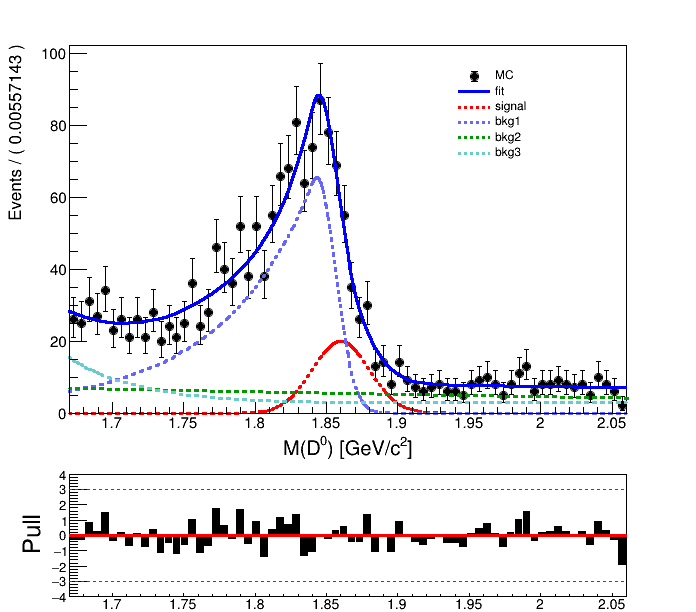

In [36]:
from IPython.display import Image
Image("test2_x_D0.png")


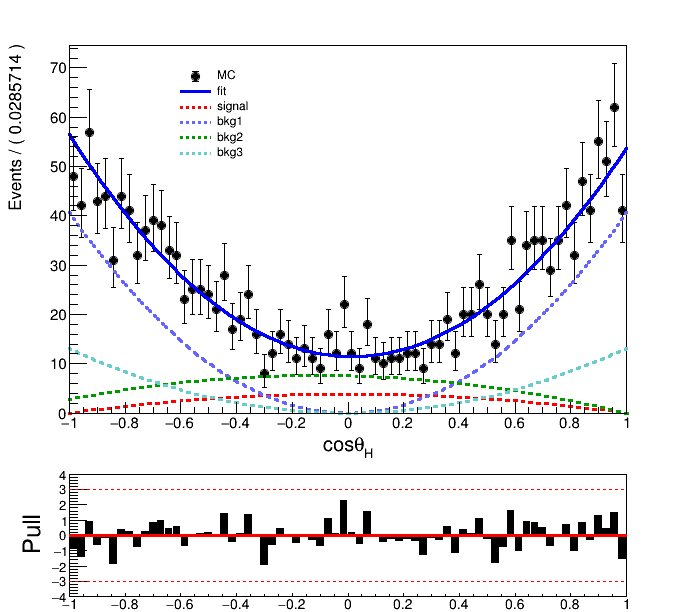

In [37]:
Image("test2_y_D0.png")

In [38]:
print(nsig)
print(nbkg1)
print(nbkg2)
print(nbkg3)

RooRealVar::nsig = 179.929 +/- 23.9807  L(0 - 1816) 

RooRealVar::nbkg1 = 947.622 +/- 47.1728  L(0 - 1816) 

RooRealVar::nbkg2 = 384.105 +/- 33.3703  L(0 - 1816) 

RooRealVar::nbkg3 = 304.266 +/- 40.4566  L(0 - 1816) 



In [37]:
print(nsig)
print(nbkg1)
print(nbkg2)
# print(nbkg3)

RooRealVar::nsig = 139.662 +/- 11.8285  L(0 - 1823) 

RooRealVar::nbkg1 = 828.19 +/- 26.0911  L(0 - 1823) 

RooRealVar::nbkg2 = 442.017 +/- 21.0699  L(0 - 1823) 



In [8]:
print(nsig)
print(nbkg1)
print(nbkg2)
# print(nbkg3)

RooRealVar::nsig = 62.3059 +/- 11.3825  L(0 - 264) 

RooRealVar::nbkg1 = 149.076 +/- 15.1632  L(0 - 264) 

RooRealVar::nbkg2 = 52.6174 +/- 10.3663  L(0 - 264) 



In [15]:
print(nsig)
print(nbkg1)
print(nbkg2)
# print(nbkg3)

RooRealVar::nsig = 63.626 +/- 11.2836  L(0 - 342) 

RooRealVar::nbkg1 = 183.468 +/- 21.0197  L(0 - 342) 

RooRealVar::nbkg2 = 94.9066 +/- 18.5807  L(0 - 342) 



In [48]:
# base_file_loc = '/media/jykim/T7/storage/01_recon/trainv2new_pi0veto/'
base_file_loc = '/media/jykim/T7/storage/01_recon/trainv2new_400invfb/'


# phigamma_ccbar = base_file_loc + 'topo/skim_1abinv_phi_D0_M/topoana.root'
phigamma_ccbar = base_file_loc + 'ccbar/recon_udst_*.root'
phigamma_uubar = base_file_loc + 'uubar/recon_udst_*.root'
phigamma_ddbar = base_file_loc + 'ddbar/recon_udst_*.root'
phigamma_ssbar = base_file_loc + 'ssbar/recon_udst_*.root'
phigamma_charged = base_file_loc + 'charged/recon_udst_*.root'
phigamma_mixed = base_file_loc + 'mixed/recon_udst_*.root'
phigamma_taupair = base_file_loc + 'taupair/recon_udst_*.root'


base_filter='Pi0_Prob<0.9 && Pis_charge== -1 && D0_M>1.67 && D0_M<2.06'
#ccbar_filter='Pi0_Prob<0.9 && Pis_charge==1 && D0_M>1.67 && D0_M<2.06 && (iCascDcyBrP_Dst_0 !=1 && iCascDcyBrP_Dst_0 !=2)'
# ccbar_filter='Pi0_Prob<0.9 && Pis_charge==1 && D0_M>1.67 && D0_M<2.06 '


#ccbar_filter='Pi0_Prob<0.9 && D0_M>1.67 && D0_M<2.06 && (iCascDcyBrP_D0_0 !=0 ) && (phi_rank_Dstp ==1)'

variables=['D0_M','D0_cosHel_0']
topo_variables=['D0_M','D0_cosHel_0','iCascDcyBrP_Dst_0']
tree='phi'

In [49]:
# pd_phigamma_ccbar = get_pd(file=phigamma_ccbar, tree=tree,base_filter=base_filter,variables=topo_variables)
D0bar_pd_phigamma_ccbar = get_pd(file=phigamma_ccbar, tree=tree,base_filter=base_filter,variables=variables)

D0bar_pd_phigamma_uubar = get_pd(file=phigamma_uubar, tree=tree,base_filter=base_filter,variables=variables)
D0bar_pd_phigamma_ddbar = get_pd(file=phigamma_ddbar, tree=tree,base_filter=base_filter,variables=variables)
D0bar_pd_phigamma_ssbar = get_pd(file=phigamma_ssbar, tree=tree,base_filter=base_filter,variables=variables)
D0bar_pd_phigamma_charged = get_pd(file=phigamma_charged, tree=tree,base_filter=base_filter,variables=variables)
D0bar_pd_phigamma_mixed = get_pd(file=phigamma_mixed, tree=tree,base_filter=base_filter,variables=variables)
D0bar_pd_phigamma_taupair = get_pd(file=phigamma_taupair, tree=tree,base_filter=base_filter,variables=variables)

In [50]:
D0bar_phigamma_generic=pd.concat([D0bar_pd_phigamma_ccbar,
                           D0bar_pd_phigamma_uubar,
                           D0bar_pd_phigamma_ddbar,
                           D0bar_pd_phigamma_ssbar,
                           D0bar_pd_phigamma_charged,
                           D0bar_pd_phigamma_mixed,
                           D0bar_pd_phigamma_taupair],ignore_index=True)

In [51]:
# signal_filter='Pi0_Prob<0.9 && Pis_charge==1 && D0_M>1.67 && D0_M<2.06 && ( iCascDcyBrP_Dst_0 ==2)'
#signal_filter='Pi0_Prob<0.9 && Pis_charge==-1 && D0_M>1.7 && D0_M<2.06 && ( iCascDcyBrCcP_Dst_0 ==2)'
#signal_ccbar = get_pd(file=phigamma_ccbar, tree=tree,base_filter=signal_filter,variables=topo_variables)
#signal_ccbar

In [52]:
#signal_filter='Pi0_Prob<0.9 && Pis_charge==-1 && D0_M>1.7 && D0_M<2.06 && ( iCascDcyBrCcP_Dst_0 ==1)'
#signal_ccbar = get_pd(file=phigamma_ccbar, tree=tree,base_filter=signal_filter,variables=topo_variables)
#signal_ccbar

In [53]:
D0bar_M_pd_data = D0bar_phigamma_generic['D0_M']
D0bar_cosHel_0_pd_data = D0bar_phigamma_generic['D0_cosHel_0']

D0bar_M_np_data = D0bar_M_pd_data.to_numpy()
D0bar_cosHel_0_np_data = D0bar_cosHel_0_pd_data.to_numpy()

In [54]:
#ROOT.RooClassFactory.makePdf("MyPdf_xsquared_nopara", "x", "", "x*x")
ROOT.gROOT.ProcessLineSync(".x MyPdf_xsquared_nopara.cxx+")

93835401239760

(MyPdf_xsquared_nopara) An instance of MyPdf_xsquared_nopara.


Info in <ACLiC>: unmodified script has already been compiled and loaded


In [55]:
#ROOT.RooClassFactory.makePdf("MyPdf_one_minus_squared", "y", "", "1-y*y")
ROOT.gROOT.ProcessLineSync(".x MyPdf_one_minus_squared.cxx+")

93835576736816

(MyPdf_one_minus_squared) An instance of MyPdf_one_minus_squared.


Info in <ACLiC>: unmodified script has already been compiled and loaded


[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:NumericIntegration -- RooRealIntegral::init(y_sig_model_Int[cos#theta_{H}]) using numeric integrator RooIntegrator1D to calculate Int(cos#theta_{H})
[#1] INFO:NumericIntegration -- RooRealIntegral::init(y_bkg1_model_Int[cos#theta_{H}]) using numeric integrator RooIntegrator1D to calculate Int(cos#theta_{H})
[#1] INFO:Eval -- RooAbsTestStatistic::initMPMode: started 12 remote server process.
 **********
 **   37 **SET PRINT           1
 **********
 **********
 **   38 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 nbkg1        6.00000e+02  1.21100e+02    0.00000e+00  1.21100e+03
     2 nbkg2        3.00000e+02  1.21100e+02    0.00000e+00  1.21100e+03
     3 nsig         2.00000e+02  1.00000e+02    0.00000e+00  1.21100e+03
     4 x_bkg1_alpha   5.00000e-01  2.00000e-01    1.00000e-01  5.00000e+00
     5 x_bkg1_mean   1.86

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas
Info in <TCanvas::Print>: png file test2_x_D0bar.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas
Info in <TCanvas::Print>: png file test2_y_D0bar.png has been created


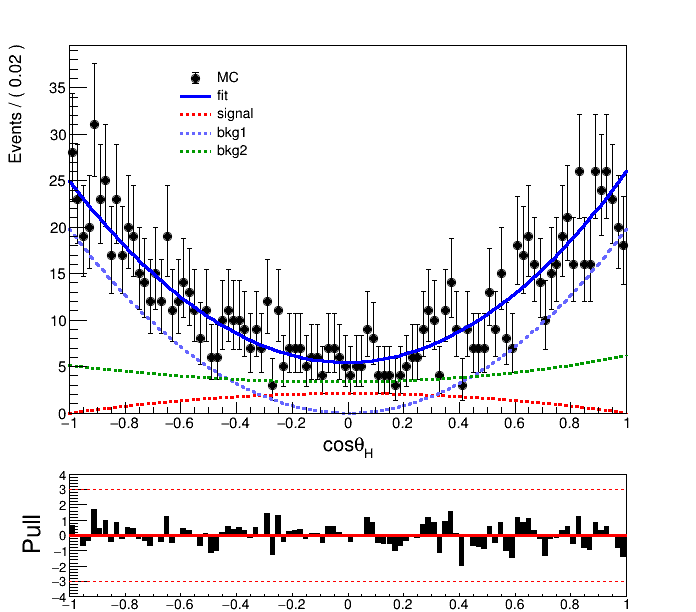

In [56]:
file1_name="test2_x_D0bar.png"
file2_name="test2_y_D0bar.png"


####################
#D0_M
x = ROOT.RooRealVar("M(D^{0})", "M(D^{0}) [GeV/c^{2}]", 1.67, 2.06, "")
# x = ROOT.RooRealVar("M(D^{0})", "M(D^{0}) [GeV/c^{2}]", 1.72, 2.01, "")

# x.setBins(30)

#### Construct signal model for x
x_sig_mean = ROOT.RooRealVar("x_sig_mean", "mean of gaussians", 1.86,1.84, 1.89)
# x_sig_sigma1 = ROOT.RooRealVar("x_sig_sigma1", "width of gaussians", 0.03,0,0.5)
x_sig_sigma2 = ROOT.RooRealVar("x_sig_sigma2", "width of gaussians", 0.01,0.005,0.1)
#x_sig_sigma3 = ROOT.RooRealVar("x_sig_sigma3", "width of gaussians", 0.03,0,0.7)

x_sig_alpha = ROOT.RooRealVar("x_sig_alpha", "width of gaussians", 3,0.1,5)
x_sig_n_CB = ROOT.RooRealVar("x_sig_n_CB", "width of gaussians", 0.1,0,10)

# x_sig_alpha = ROOT.RooRealVar("x_sig_alpha", "width of gaussians", 0.5,0.1,10)
# x_sig_n_CB = ROOT.RooRealVar("x_sig_n_CB", "width of gaussians", 3,0.1,5)

#Novo_peak = ROOT.RooRealVar("Novo_peak", "Novo peak", 1.83,1.73,1.93)    
#x_sig_Novo_width = ROOT.RooRealVar("x_sig_Novo_width", "Novo peak", 0.05,0,0.5)    
#x_sig_Novo_tail = ROOT.RooRealVar("x_sig_Novo_tail", "Novo peak", 0.5,0,10)    

# x_sig_1 = ROOT.RooGaussian("x_sig_1", "Signal component 1", x, x_sig_mean, x_sig_sigma1)
# x_sig_2 = ROOT.RooCBShape("x_sig_2", "Signal component 2", x, x_sig_mean, x_sig_sigma2, x_sig_alpha, x_sig_n_CB)
# # #x_sig_3 = ROOT.RooGaussian("x_sig_3", "Signal component 1", x, x_sig_mean, x_sig_sigma3)
# # #x_sig_3 = ROOT.RooNovosibirsk("x_sig_3", "Signal component 3", x, x_sig_mean, x_sig_Novo_width, x_sig_Novo_tail)

# x_sig1frac = ROOT.RooRealVar("x_sig1frac", "fraction of component 1 in signal", 0.2, 0.0, 1.0)
# # # x_sig_sum1 = ROOT.RooAddPdf("x_sig_sum1", "Signal1", [x_sig_2, x_sig_1], x_sig1frac)
# x_sig_model = ROOT.RooAddPdf("x_sig_model", "Signal1", [x_sig_2, x_sig_1], x_sig1frac)



#x_sig2frac = ROOT.RooRealVar("x_sig2frac", "fraction of component 2 in signal", 0.2, 0.0, 1.0)
#x_sig_model = ROOT.RooAddPdf("x_sig_model", "Signal", [x_sig_3, x_sig_sum1], x_sig2frac)

x_sig_model = ROOT.RooCBShape("x_sig_model", "Signal component 2", x, x_sig_mean, x_sig_sigma2, x_sig_alpha, x_sig_n_CB)



#### Construct bkg model for x
#phi pi0
x_bkg1_mean = ROOT.RooRealVar("x_bkg1_mean", "mean of gaussians", 1.86,1.83, 1.87)
# x_bkg1_sigma1 = ROOT.RooRealVar("x_bkg1_sigma1", "width of gaussians", 0.03,0,0.5)
x_bkg1_sigma2 = ROOT.RooRealVar("x_bkg1_sigma2", "width of gaussians", 0.02,0,0.1)
# x_bkg1_sigma3 = ROOT.RooRealVar("x_bkg1_sigma3", "width of gaussians", 0.02,0,0.5)

x_bkg1_alpha = ROOT.RooRealVar("x_bkg1_alpha", "width of gaussians", 0.5,0.1,5)
x_bkg1_n_CB = ROOT.RooRealVar("x_bkg1_n_CB", "width of gaussians", 0.1,0.001,20)
    
# x_bkg1_1 = ROOT.RooGaussian("x_bkg1_1", "Signal component 1", x, x_bkg1_mean, x_bkg1_sigma1)
# x_bkg1_2 = ROOT.RooCBShape("x_bkg1_2", "Signal component 2", x, x_bkg1_mean, x_bkg1_sigma2, x_bkg1_alpha, x_bkg1_n_CB)

# x_bkg1frac = ROOT.RooRealVar("x_bkg1frac", "fraction of component 1 in signal", 0.2, 0.0, 1.0)
# x_bkg1_model = ROOT.RooAddPdf("x_bkg1_model", "Signal1", [x_bkg1_2, x_bkg1_1], x_bkg1frac)

x_bkg1_model = ROOT.RooCBShape("x_bkg1_model", "Signal component 2", x, x_bkg1_mean, x_bkg1_sigma2, x_bkg1_alpha, x_bkg1_n_CB)


####BKG2
# remaining
# x_bkg2_tau = ROOT.RooRealVar("x_bkg2_tau", "tau",-15, -50,0)

# x_bkg2_mean = ROOT.RooRealVar("x_bkg2_mean", "mean of gaussians", 1.83,1.81, 1.84)
# x_bkg2_sigma1 = ROOT.RooRealVar("x_bkg2_sigma1", "width of gaussians", 0.04,0.01,0.05)

x_bkg2_mean = ROOT.RooRealVar("x_bkg2_mean", "mean of gaussians", 1.65,1.58, 1.67)
x_bkg2_sigma1 = ROOT.RooRealVar("x_bkg2_sigma1", "width of gaussians", 0.05,0.001,0.07)



# x_bkg2_mean = ROOT.RooRealVar("x_bkg2_mean", "mean of gaussians", 1.83,1.80, 1.85)
# x_bkg2_sigma1 = ROOT.RooRealVar("x_bkg2_sigma1", "width of gaussians", 0.05,0.03,0.08)


#x_bkg2_sigma2 = ROOT.RooRealVar("x_bkg2_sigma2", "width of gaussians", 0.05,0.01,0.5)


# x_bkg2_mean2 = ROOT.RooRealVar("x_bkg2_mean", "mean of gaussians", 1.6,1.4, 1.7)
# x_bkg2_sigma2 = ROOT.RooRealVar("x_bkg2_sigma1", "width of gaussians", 0.05,0.03,0.5)
# 

x_bkg2_c0 = ROOT.RooRealVar("x_bkg2_c0", "c0",0.5, -1,1)
# x_bkg2_c1 = ROOT.RooRealVar("x_bkg2_c1", "c1",0.2, -1,1)

x_bkg2_mu =  ROOT.RooRealVar("x_bkg2_mu", "mean of gaussians", 1.83,1.81, 1.85)
x_bkg2_lambda1 = ROOT.RooRealVar("x_bkg2_lambda1", "Novo peak", 0.05, 0.02, 0.1) 
x_bkg2_gamma = ROOT.RooRealVar("x_bkg2_gamma", "Novo peak", 1.2, 0.5, 5) 
x_bkg2_delta  = ROOT.RooRealVar("x_bkg2_delta", "Novo peak", 1, 0.1, 5) 


# x_bkg2_1 = ROOT.RooJohnson("x_bkg2_1", "Signal component 1", x, x_bkg2_mu, x_bkg2_js_lambda, x_bkg2_gamma, x_bkg2_delta)
#x_bkg2_1 = ROOT.RooExponential("x_bkg2_1", "Signal component 1", x, x_bkg2_tau)
#x_bkg2_2 = ROOT.RooPolynomial("x_bkg2_2", "Signal component 1", x, ROOT.RooArgList(x_bkg2_c1), lowestOrder=1)

# x_bkg2_1 = ROOT.RooExponential("x_bkg2_1", "Signal component 1", x, x_bkg2_tau)
# x_bkg2_2 = ROOT.RooGaussian("x_bkg2_2", "Signal component 1", x, x_bkg2_mean, x_bkg2_sigma1)
# x_bkg2_3 = ROOT.RooPolynomial("x_bkg2_3", "Signal component 1", x, ROOT.RooArgList(x_bkg2_c0,x_bkg2_c1), lowestOrder=2)


x_bkg2_1 = ROOT.RooGaussian("x_bkg2_1", "Signal component 1", x, x_bkg2_mean, x_bkg2_sigma1)
x_bkg2_2 = ROOT.RooPolynomial("x_bkg2_2", "Signal component 1", x, ROOT.RooArgList(x_bkg2_c0), lowestOrder=1)
x_bkg2_3 = ROOT.RooJohnson("x_bkg2_3", "Signal component 3", x, x_bkg2_mu, x_bkg2_lambda1, x_bkg2_gamma, x_bkg2_delta)



# x_bkg2_3 = ROOT.RooGaussian("x_bkg2_3", "Signal component 1", x, x_bkg2_mean, x_bkg2_sigma2)



x_bkg2frac1 = ROOT.RooRealVar("x_bkg2frac1", "fraction of component 1 in signal", 0.2, 0.0, 1.0)
# x_bkg2_model = ROOT.RooAddPdf("x_bkg2_model", "Signal1", [x_bkg2_2, x_bkg2_1], x_bkg2frac2)


x_bkg2_sum1 = ROOT.RooAddPdf("x_bkg2_sum1", "Signal1", [x_bkg2_2, x_bkg2_1], x_bkg2frac1)


x_bkg2frac2 = ROOT.RooRealVar("x_bkg2frac2", "fraction of component 1 in signal", 0.2, 0.0, 1.0)
x_bkg2_model = ROOT.RooAddPdf("x_bkg2_model", "Signal1", [x_bkg2_3, x_bkg2_sum1], x_bkg2frac2)






#phipi0,Kshort K+k-
####BKG3
# x_bkg3_mean = ROOT.RooRealVar("x_bkg3_mean", "mean of gaussians", 1.65,1.58, 1.68)
# x_bkg3_sigma1 = ROOT.RooRealVar("x_bkg3_sigma1", "width of gaussians", 0.01,0,0.08)

# x_bkg3_model = ROOT.RooGaussian("x_bkg3_model", "Signal component 1", x,x_bkg3_mean, x_bkg3_sigma1)


################
#D0_cosHel_0
yrange=(-1,1)
y = ROOT.RooRealVar("cos#theta_{H}", "cos#theta_{H}", yrange[0], yrange[1], "")
# y.setBins(50)

y_sig_model = ROOT.MyPdf_one_minus_squared("y_sig_model", "y_sig", y)




#### Construct bkg model for y
#phi pi0
y_bkg1_model = ROOT.MyPdf_xsquared_nopara("y_bkg1_model", "y_bkg1", y)
#remaining
y_bkg2_c0 = ROOT.RooRealVar("y_bkg2_c0", "c0",0.5, -1,1)
y_bkg2_c1 = ROOT.RooRealVar("y_bkg2_c1", "c1",0.2, -1,1)
y_bkg2_c2 = ROOT.RooRealVar("y_bkg2_c2", "c2",0.3, -1,1)
y_bkg2_model= ROOT.RooChebychev("y_bkg2_model", "Signal component 1", y, ROOT.RooArgList(y_bkg2_c0, y_bkg2_c1, y_bkg2_c2))

####BKG3
# y_bkg3_c0 = ROOT.RooRealVar("y_bkg3_c0", "c0",0.1, 0,1.)
# y_bkg3_c1 = ROOT.RooRealVar("y_bkg3_c1", "c1",0.5, 0,1.)
# y_bkg3_c2 = ROOT.RooRealVar("y_bkg3_c2", "c2",-0.3, -1.,0.)
# y_bkg3_model = ROOT.RooChebychev("y_bkg3_model", "Signal component 1", y, ROOT.RooArgList(y_bkg3_c0, y_bkg3_c1, y_bkg3_c2))


#### Combine bkg models
# y_phipi0frac = ROOT.RooRealVar("y_phipi0frac", "fraction of component 1 in signal", 0.2, 0.0, 1.0)
# y_bkg_model = ROOT.RooAddPdf("y_bkg_model", "Signal", [y_bkg1_model, y_bkg2_model], y_phipi0frac)


################
bkg1_xy_model = ROOT.RooProdPdf("bkg1_xy_model","bkg1_xy_model",ROOT.RooArgSet(x_bkg1_model,y_bkg1_model))
bkg2_xy_model = ROOT.RooProdPdf("bkg2_xy_model","bkg2_xy_model",ROOT.RooArgSet(x_bkg2_model,y_bkg2_model))
# bkg3_xy_model = ROOT.RooProdPdf("bkg3_xy_model","bkg3_xy_model",ROOT.RooArgSet(x_bkg3_model,y_bkg3_model))


sig_model = ROOT.RooProdPdf("sig_model","sig_xy_model",ROOT.RooArgSet(x_sig_model, y_sig_model))


####################################
# construct signal + bkg pdf
nsig = ROOT.RooRealVar("nsig","# signal events",200,0,len(D0bar_M_np_data))
nbkg1 = ROOT.RooRealVar("nbkg1","# bkg events",600,0, len(D0bar_M_np_data))
nbkg2 = ROOT.RooRealVar("nbkg2","# bkg events",300,0, len(D0bar_M_np_data))
# nbkg3 = ROOT.RooRealVar("nbkg3","# bkg events",300,0., len(D0_M_np_data))


# extended_model = ROOT.RooAddPdf("extended_model", "x_model", ROOT.RooArgSet(sig_model,bkg1_xy_model,bkg2_xy_model,bkg3_xy_model), ROOT.RooArgSet(nsig, nbkg1, nbkg2, nbkg3))
extended_model = ROOT.RooAddPdf("extended_model", "x_model", ROOT.RooArgSet(sig_model,bkg1_xy_model,bkg2_xy_model), ROOT.RooArgSet(nsig, nbkg1, nbkg2))

#####################################
# # Associated nsig/nbkg as expected number of events with sig/bkg
# esig = ROOT.RooExtendPdf("esig", "extended signal pdf", sig_xy_model, nsig)
# ebkg = ROOT.RooExtendPdf("ebkg", "extended background pdf", bkg_xy_model, nbkg)
 
# # Sum extended components without coefs
# # -------------------------------------------------------------------------
 
# # Construct sum of two extended pdf (no coefficients required)
# extended_model = ROOT.RooAddPdf("extended_model", "bkg_sig", [ebkg, esig ])


# datax = ROOT.RooDataSet.from_numpy({"M(D^{0})": np_data['D0_M']}, [x])
# datay = ROOT.RooDataSet.from_numpy({"cos#theta_{H}": np_data['D0_cosHel_0']}, [y])

data = ROOT.RooDataSet.from_numpy({"M(D^{0})": D0bar_M_np_data, "cos#theta_{H}": D0bar_cosHel_0_np_data}, [x,y])

canv = ROOT.TCanvas("Canvas", "Canvas", 700, 640)

xlow = ctypes.c_double()
ylow = ctypes.c_double()
xup = ctypes.c_double()
yup = ctypes.c_double()

canv.GetPad(0).GetPadPar(xlow, ylow, xup, yup)
canv.Divide(1,2)

xlow = xlow.value
ylow = ylow.value
xup = xup.value
yup = yup.value

upPad = canv.GetPad(1)
upPad.SetPad(xlow, ylow+0.25*(yup-ylow),xup,yup)

dwPad = canv.GetPad(2)
dwPad.SetPad(xlow, ylow,xup,ylow+0.25*(yup-ylow))

    # r = sig.fitTo(data,NumCPU=12, Range=(1.84,1.89))
# r = sig_xy_model.fitTo(data,NumCPU=12, Range=(1.70,1.98))
r = extended_model.fitTo(data,NumCPU=12, Extended=ROOT.kTRUE)

    # r.Print()
canv.cd(1) 
#     frame = x.frame(Title="D^{0} #rightarrow #bar{K}^{*0} #pi^{0}")
frame = x.frame(Title=" ")

data.plotOn(frame,Name = "data1", XErrorSize=0)

    # sig1.plotOn(frame, LineStyle="--", LineColor="r")
    # sig2.plotOn(frame, LineStyle="--", LineColor="r")
# sig.plotOn(frame, Name="gauss1", Components=sig1, LineStyle=ROOT.kDashed, LineColor=593)
# sig.plotOn(frame, Name="CB1", Components=sig2, LineStyle=ROOT.kDashed, LineColor=593)
# sig.plotOn(frame, Name="CB2", Components=sig3, LineStyle=ROOT.kDashed, LineColor=593)

# sig_xy_model.plotOn(frame,Components=mass_sig, ProjWData=data, Name="fitting")
extended_model.plotOn(frame, Name="fitx_sig", Components=x_sig_model, LineStyle=ROOT.kDashed, LineColor='r')
# extended_model.plotOn(frame, Name="fitx_bkg", Components=ROOT.RooArgSet(x_bkg1_model,x_bkg2_model), LineStyle=ROOT.kDashed, LineColor=ROOT.kGreen+2)
extended_model.plotOn(frame, Name="fitx_bkg1", Components=x_bkg1_model, LineStyle=ROOT.kDashed, LineColor=593)
extended_model.plotOn(frame, Name="fitx_bkg2", Components=x_bkg2_model, LineStyle=ROOT.kDashed, LineColor=ROOT.kGreen+2)
# extended_model.plotOn(frame, Name="fitx_bkg3", Components=x_bkg3_model, LineStyle=ROOT.kDashed, LineColor=579)



# extended_model.plotOn(frame, Name="fitx1", Components=x_bkg2_model, LineStyle=ROOT.kDashed, LineColor=593)

# extended_model.plotOn(frame, Name="fitx2", Components=x_sig_3, LineStyle=ROOT.kDashed, LineColor='r')
#sig_xy_model.plotOn(frame, Name="fitx3", Components=sig3, LineStyle=ROOT.kDashed, LineColor=593)

extended_model.plotOn(frame,Name="fitting")
frame.Draw("PE")

    # sig.paramOn(frame)
frame.GetXaxis().SetTitleSize(0.047)
frame.GetXaxis().CenterTitle(True)
frame.GetYaxis().SetTitleSize(0.04)
frame.GetYaxis().SetTitleOffset(1.2)
    


leg1 = ROOT.TLegend(0.65, 0.65, 0.9, 0.85)
# leg1.SetFillColor(ROOT.kWhite)
leg1.SetFillColor(0)

    # leg1.SetHeader("The Legend title","C")
leg1.AddEntry("data1", "MC", "PE")
leg1.AddEntry("fitting", "fit", "l")
leg1.AddEntry("fitx_sig", "signal", "l")
leg1.AddEntry("fitx_bkg1", "bkg1", "l")
leg1.AddEntry("fitx_bkg2", "bkg2", "l")

# leg1.SetTextSize(0.05)
# leg1.SetTextAlign(13)

leg1.SetBorderSize(0)
leg1.Draw()

hpull = frame.pullHist()
hpull.SetFillStyle(1001)
hpull.SetFillColor(1);
for i in range(0,hpull.GetN()):#(int i=0;i<hpull.GetN();++i): 
    hpull.SetPointError(i,0.0,0.0,0.0,0.0)
    # pullplot = x.frame(Title(" "))
pullplot = x.frame()
pullplot.SetTitle("")
pullplot.addPlotable(hpull,"BE")
    # pullplot.addPlotable(hpull,"PE")

pullplot.SetYTitle("Pull")
pullplot.GetXaxis().SetTitleSize(0)
pullplot.GetYaxis().SetTitleSize(0.17)
pullplot.GetYaxis().CenterTitle(True)
pullplot.GetYaxis().SetTitleOffset(0.2)
pullplot.SetMinimum(-4.)
pullplot.SetMaximum(4.)
pullplot.GetXaxis().SetLabelSize(0.1)
pullplot.GetYaxis().SetLabelSize(0.09)
canv.cd(2)
pullplot.Draw()

xmin1 = ctypes.c_double(1.67)
xmax1 = ctypes.c_double(2.06)
    # xmin1 = 0.1
    # xmax1 = 0.18
line = ROOT.TLine(xmin1,0.0,xmax1,0.0)
line1 = ROOT.TLine(xmin1,3.0,xmax1,3.0)
line2 = ROOT.TLine(xmin1,-3.0,xmax1,-3.0)

line.SetLineColor(ROOT.kRed)
line.SetLineWidth(3)
line1.SetLineColor(ROOT.kRed)
line2.SetLineColor(ROOT.kRed)
line1.SetLineStyle(2)
line2.SetLineStyle(2)
line.Draw("SAME")
line1.Draw("SAME")
line2.Draw("SAME")

canv.Update()

canv.Draw()
canv.SaveAs(file1_name)

#######################################
canv2 = ROOT.TCanvas("Canvas", "Canvas", 700, 640)
# canv2.cd()
y_xlow = ctypes.c_double()
y_ylow = ctypes.c_double()
y_xup = ctypes.c_double()
y_yup = ctypes.c_double()

canv2.GetPad(0).GetPadPar(y_xlow, y_ylow, y_xup, y_yup)
canv2.Divide(1,2)

y_xlow = y_xlow.value
y_ylow = y_ylow.value
y_xup = y_xup.value
y_yup = y_yup.value

y_upPad = canv2.GetPad(1)
y_upPad.SetPad(y_xlow, y_ylow+0.25*(y_yup-y_ylow),y_xup,y_yup)

y_dwPad = canv2.GetPad(2)
y_dwPad.SetPad(y_xlow, y_ylow,y_xup,y_ylow+0.25*(y_yup-y_ylow))


yframe = y.frame(Title=" ")
canv2.cd(1) 
data.plotOn(yframe,Name = "data2", XErrorSize=0)

    # sig1.plotOn(frame, LineStyle="--", LineColor="r")
    # sig2.plotOn(frame, LineStyle="--", LineColor="r")
# sig.plotOn(frame, Name="gauss1", Components=sig1, LineStyle=ROOT.kDashed, LineColor=593)
# sig.plotOn(frame, Name="CB1", Components=sig2, LineStyle=ROOT.kDashed, LineColor=593)
# sig.plotOn(frame, Name="CB2", Components=sig3, LineStyle=ROOT.kDashed, LineColor=593)

# sig_xy_model.plotOn(frame,Components=mass_sig, ProjWData=data, Name="fitting")

extended_model.plotOn(yframe, Name="fity_sig", Components=y_sig_model, LineStyle=ROOT.kDashed, LineColor='r')
extended_model.plotOn(yframe, Name="fity_bkg1", Components=ROOT.RooArgSet(y_bkg1_model), LineStyle=ROOT.kDashed, LineColor=593)
extended_model.plotOn(yframe, Name="fity_bkg2", Components=ROOT.RooArgSet(y_bkg2_model), LineStyle=ROOT.kDashed, LineColor=ROOT.kGreen+2)

# extended_model.plotOn(yframe, Name="fity_bkg", Components=ROOT.RooArgSet(y_bkg1_model,y_bkg2_model), LineStyle=ROOT.kDashed, LineColor=ROOT.kGreen+2)
# extended_model.plotOn(yframe, Name="fity_bkg", Components=ROOT.RooArgSet(y_bkg1_model,y_bkg2_model,y_bkg3_model), LineStyle=ROOT.kDashed, LineColor=593)

#sig_xy_model.plotOn(yframe, Name="fit3", Components=sigy3, LineStyle=ROOT.kDashed, LineColor=593)



extended_model.plotOn(yframe,Name="fitting2")



yframe.Draw("PE")

    # sig.paramOn(frame)
yframe.GetXaxis().SetTitleSize(0.047)
yframe.GetXaxis().CenterTitle(True)
yframe.GetYaxis().SetTitleSize(0.04)
yframe.GetYaxis().SetTitleOffset(1.2)
    


y_leg1 = ROOT.TLegend(0.25, 0.65, 0.5, 0.85)
# y_leg1.SetFillColor(ROOT.kWhite)
y_leg1.SetFillColor(0)

    # leg1.SetHeader("The Legend title","C")
y_leg1.AddEntry("data2", "MC", "PE")
y_leg1.AddEntry("fitting2", "fit", "l")
y_leg1.AddEntry("fity_sig", "signal", "l")
y_leg1.AddEntry("fity_bkg1", "bkg1", "l")
y_leg1.AddEntry("fity_bkg2", "bkg2", "l")

y_leg1.SetBorderSize(0)

y_leg1.Draw()

y_hpull = yframe.pullHist()
y_hpull.SetFillStyle(1001)
y_hpull.SetFillColor(1);
for i in range(0,y_hpull.GetN()):#(int i=0;i<hpull.GetN();++i): 
    y_hpull.SetPointError(i,0.0,0.0,0.0,0.0)
    # pullplot = x.frame(Title(" "))
y_pullplot = y.frame()
y_pullplot.SetTitle("")
y_pullplot.addPlotable(y_hpull,"BE")
    # pullplot.addPlotable(hpull,"PE")

y_pullplot.SetYTitle("Pull")
y_pullplot.GetXaxis().SetTitleSize(0)
y_pullplot.GetYaxis().SetTitleSize(0.17)
y_pullplot.GetYaxis().CenterTitle(True)
y_pullplot.GetYaxis().SetTitleOffset(0.2)
y_pullplot.SetMinimum(-4.)
y_pullplot.SetMaximum(4.)
y_pullplot.GetXaxis().SetLabelSize(0.1)
y_pullplot.GetYaxis().SetLabelSize(0.09)
canv2.cd(2)
y_pullplot.Draw()

y_xmin1 = ctypes.c_double(-1)
y_xmax1 = ctypes.c_double(1)
y_line = ROOT.TLine(y_xmin1,0.0,y_xmax1,0.0)
y_line1 = ROOT.TLine(y_xmin1,3.0,y_xmax1,3.0)
y_line2 = ROOT.TLine(y_xmin1,-3.0,y_xmax1,-3.0)

y_line.SetLineColor(ROOT.kRed)
y_line.SetLineWidth(3)
y_line1.SetLineColor(ROOT.kRed)
y_line2.SetLineColor(ROOT.kRed)
y_line1.SetLineStyle(2)
y_line2.SetLineStyle(2)
y_line.Draw("SAME")
y_line1.Draw("SAME")
y_line2.Draw("SAME")

canv2.Update()

canv2.Draw()
canv2.SaveAs(file2_name)

In [57]:
print(nsig)
print(nbkg1)
print(nbkg2)

RooRealVar::nsig = 139.82 +/- 34.303  L(0 - 1211) 

RooRealVar::nbkg1 = 659.687 +/- 56.8547  L(0 - 1211) 

RooRealVar::nbkg2 = 411.476 +/- 65.0427  L(0 - 1211) 



In [16]:
file1_name="test2_x_D0.png"
file2_name="test2_y_D0.png"


####################
#D0_M
x = ROOT.RooRealVar("M(D^{0})", "M(D^{0}) [GeV/c^{2}]", 1.67, 2.06, "")
# x = ROOT.RooRealVar("M(D^{0})", "M(D^{0}) [GeV/c^{2}]", 1.72, 2.01, "")

# x.setBins(30)

#### Construct signal model for x
x_sig_mean = ROOT.RooRealVar("x_sig_mean", "mean of gaussians", 1.86,1.84, 1.89)
# x_sig_sigma1 = ROOT.RooRealVar("x_sig_sigma1", "width of gaussians", 0.03,0,0.5)
x_sig_sigma2 = ROOT.RooRealVar("x_sig_sigma2", "width of gaussians", 0.01,0.005,0.1)
#x_sig_sigma3 = ROOT.RooRealVar("x_sig_sigma3", "width of gaussians", 0.03,0,0.7)

x_sig_alpha = ROOT.RooRealVar("x_sig_alpha", "width of gaussians", 3,0.1,5)
x_sig_n_CB = ROOT.RooRealVar("x_sig_n_CB", "width of gaussians", 0.1,0,10)

# x_sig_alpha = ROOT.RooRealVar("x_sig_alpha", "width of gaussians", 0.5,0.1,10)
# x_sig_n_CB = ROOT.RooRealVar("x_sig_n_CB", "width of gaussians", 3,0.1,5)

#Novo_peak = ROOT.RooRealVar("Novo_peak", "Novo peak", 1.83,1.73,1.93)    
#x_sig_Novo_width = ROOT.RooRealVar("x_sig_Novo_width", "Novo peak", 0.05,0,0.5)    
#x_sig_Novo_tail = ROOT.RooRealVar("x_sig_Novo_tail", "Novo peak", 0.5,0,10)    

# x_sig_1 = ROOT.RooGaussian("x_sig_1", "Signal component 1", x, x_sig_mean, x_sig_sigma1)
# x_sig_2 = ROOT.RooCBShape("x_sig_2", "Signal component 2", x, x_sig_mean, x_sig_sigma2, x_sig_alpha, x_sig_n_CB)
# # #x_sig_3 = ROOT.RooGaussian("x_sig_3", "Signal component 1", x, x_sig_mean, x_sig_sigma3)
# # #x_sig_3 = ROOT.RooNovosibirsk("x_sig_3", "Signal component 3", x, x_sig_mean, x_sig_Novo_width, x_sig_Novo_tail)

# x_sig1frac = ROOT.RooRealVar("x_sig1frac", "fraction of component 1 in signal", 0.2, 0.0, 1.0)
# # # x_sig_sum1 = ROOT.RooAddPdf("x_sig_sum1", "Signal1", [x_sig_2, x_sig_1], x_sig1frac)
# x_sig_model = ROOT.RooAddPdf("x_sig_model", "Signal1", [x_sig_2, x_sig_1], x_sig1frac)



#x_sig2frac = ROOT.RooRealVar("x_sig2frac", "fraction of component 2 in signal", 0.2, 0.0, 1.0)
#x_sig_model = ROOT.RooAddPdf("x_sig_model", "Signal", [x_sig_3, x_sig_sum1], x_sig2frac)

x_sig_model = ROOT.RooCBShape("x_sig_model", "Signal component 2", x, x_sig_mean, x_sig_sigma2, x_sig_alpha, x_sig_n_CB)



#### Construct bkg model for x
#phi pi0
x_bkg1_mean = ROOT.RooRealVar("x_bkg1_mean", "mean of gaussians", 1.86,1.83, 1.87)
# x_bkg1_sigma1 = ROOT.RooRealVar("x_bkg1_sigma1", "width of gaussians", 0.03,0,0.5)
x_bkg1_sigma2 = ROOT.RooRealVar("x_bkg1_sigma2", "width of gaussians", 0.02,0,0.1)
# x_bkg1_sigma3 = ROOT.RooRealVar("x_bkg1_sigma3", "width of gaussians", 0.02,0,0.5)

x_bkg1_alpha = ROOT.RooRealVar("x_bkg1_alpha", "width of gaussians", 0.5,0.1,5)
x_bkg1_n_CB = ROOT.RooRealVar("x_bkg1_n_CB", "width of gaussians", 0.1,0.001,20)
    
# x_bkg1_1 = ROOT.RooGaussian("x_bkg1_1", "Signal component 1", x, x_bkg1_mean, x_bkg1_sigma1)
# x_bkg1_2 = ROOT.RooCBShape("x_bkg1_2", "Signal component 2", x, x_bkg1_mean, x_bkg1_sigma2, x_bkg1_alpha, x_bkg1_n_CB)

# x_bkg1frac = ROOT.RooRealVar("x_bkg1frac", "fraction of component 1 in signal", 0.2, 0.0, 1.0)
# x_bkg1_model = ROOT.RooAddPdf("x_bkg1_model", "Signal1", [x_bkg1_2, x_bkg1_1], x_bkg1frac)

x_bkg1_model = ROOT.RooCBShape("x_bkg1_model", "Signal component 2", x, x_bkg1_mean, x_bkg1_sigma2, x_bkg1_alpha, x_bkg1_n_CB)


####BKG2
# remaining
# x_bkg2_tau = ROOT.RooRealVar("x_bkg2_tau", "tau",-15, -50,0)

# x_bkg2_mean = ROOT.RooRealVar("x_bkg2_mean", "mean of gaussians", 1.83,1.81, 1.84)
# x_bkg2_sigma1 = ROOT.RooRealVar("x_bkg2_sigma1", "width of gaussians", 0.04,0.01,0.05)

x_bkg2_mean = ROOT.RooRealVar("x_bkg2_mean", "mean of gaussians", 1.65,1.58, 1.67)
x_bkg2_sigma1 = ROOT.RooRealVar("x_bkg2_sigma1", "width of gaussians", 0.05,0.001,0.07)



# x_bkg2_mean = ROOT.RooRealVar("x_bkg2_mean", "mean of gaussians", 1.83,1.80, 1.85)
# x_bkg2_sigma1 = ROOT.RooRealVar("x_bkg2_sigma1", "width of gaussians", 0.05,0.03,0.08)


#x_bkg2_sigma2 = ROOT.RooRealVar("x_bkg2_sigma2", "width of gaussians", 0.05,0.01,0.5)


# x_bkg2_mean2 = ROOT.RooRealVar("x_bkg2_mean", "mean of gaussians", 1.6,1.4, 1.7)
# x_bkg2_sigma2 = ROOT.RooRealVar("x_bkg2_sigma1", "width of gaussians", 0.05,0.03,0.5)
# 

x_bkg2_c0 = ROOT.RooRealVar("x_bkg2_c0", "c0",0.5, -1,1)
# x_bkg2_c1 = ROOT.RooRealVar("x_bkg2_c1", "c1",0.2, -1,1)

x_bkg2_mu =  ROOT.RooRealVar("x_bkg2_mu", "mean of gaussians", 1.83,1.81, 1.85)
x_bkg2_lambda1 = ROOT.RooRealVar("x_bkg2_lambda1", "Novo peak", 0.05, 0.02, 0.1) 
x_bkg2_gamma = ROOT.RooRealVar("x_bkg2_gamma", "Novo peak", 1.2, 0.5, 5) 
x_bkg2_delta  = ROOT.RooRealVar("x_bkg2_delta", "Novo peak", 1, 0.1, 5) 


# x_bkg2_1 = ROOT.RooJohnson("x_bkg2_1", "Signal component 1", x, x_bkg2_mu, x_bkg2_js_lambda, x_bkg2_gamma, x_bkg2_delta)
#x_bkg2_1 = ROOT.RooExponential("x_bkg2_1", "Signal component 1", x, x_bkg2_tau)
#x_bkg2_2 = ROOT.RooPolynomial("x_bkg2_2", "Signal component 1", x, ROOT.RooArgList(x_bkg2_c1), lowestOrder=1)

# x_bkg2_1 = ROOT.RooExponential("x_bkg2_1", "Signal component 1", x, x_bkg2_tau)
# x_bkg2_2 = ROOT.RooGaussian("x_bkg2_2", "Signal component 1", x, x_bkg2_mean, x_bkg2_sigma1)
# x_bkg2_3 = ROOT.RooPolynomial("x_bkg2_3", "Signal component 1", x, ROOT.RooArgList(x_bkg2_c0,x_bkg2_c1), lowestOrder=2)


x_bkg2_1 = ROOT.RooGaussian("x_bkg2_1", "Signal component 1", x, x_bkg2_mean, x_bkg2_sigma1)
x_bkg2_2 = ROOT.RooPolynomial("x_bkg2_2", "Signal component 1", x, ROOT.RooArgList(x_bkg2_c0), lowestOrder=1)
x_bkg2_3 = ROOT.RooJohnson("x_bkg2_3", "Signal component 3", x, x_bkg2_mu, x_bkg2_lambda1, x_bkg2_gamma, x_bkg2_delta)



# x_bkg2_3 = ROOT.RooGaussian("x_bkg2_3", "Signal component 1", x, x_bkg2_mean, x_bkg2_sigma2)



x_bkg2frac1 = ROOT.RooRealVar("x_bkg2frac1", "fraction of component 1 in signal", 0.2, 0.0, 1.0)
# x_bkg2_model = ROOT.RooAddPdf("x_bkg2_model", "Signal1", [x_bkg2_2, x_bkg2_1], x_bkg2frac2)


x_bkg2_sum1 = ROOT.RooAddPdf("x_bkg2_sum1", "Signal1", [x_bkg2_2, x_bkg2_1], x_bkg2frac1)


x_bkg2frac2 = ROOT.RooRealVar("x_bkg2frac2", "fraction of component 1 in signal", 0.2, 0.0, 1.0)
x_bkg2_model = ROOT.RooAddPdf("x_bkg2_model", "Signal1", [x_bkg2_3, x_bkg2_sum1], x_bkg2frac2)






#phipi0,Kshort K+k-
####BKG3
# x_bkg3_mean = ROOT.RooRealVar("x_bkg3_mean", "mean of gaussians", 1.65,1.58, 1.68)
# x_bkg3_sigma1 = ROOT.RooRealVar("x_bkg3_sigma1", "width of gaussians", 0.01,0,0.08)

# x_bkg3_model = ROOT.RooGaussian("x_bkg3_model", "Signal component 1", x,x_bkg3_mean, x_bkg3_sigma1)


################
#D0_cosHel_0
yrange=(-1,1)
y = ROOT.RooRealVar("cos#theta_{H}", "cos#theta_{H}", yrange[0], yrange[1], "")
# y.setBins(50)

y_sig_model = ROOT.MyPdf_one_minus_squared("y_sig_model", "y_sig", y)




#### Construct bkg model for y
#phi pi0
y_bkg1_model = ROOT.MyPdf_xsquared_nopara("y_bkg1_model", "y_bkg1", y)
#remaining
y_bkg2_c0 = ROOT.RooRealVar("y_bkg2_c0", "c0",0.5, -1,1)
y_bkg2_c1 = ROOT.RooRealVar("y_bkg2_c1", "c1",0.2, -1,1)
y_bkg2_c2 = ROOT.RooRealVar("y_bkg2_c2", "c2",0.3, -1,1)
y_bkg2_model= ROOT.RooChebychev("y_bkg2_model", "Signal component 1", y, ROOT.RooArgList(y_bkg2_c0, y_bkg2_c1, y_bkg2_c2))

####BKG3
# y_bkg3_c0 = ROOT.RooRealVar("y_bkg3_c0", "c0",0.1, 0,1.)
# y_bkg3_c1 = ROOT.RooRealVar("y_bkg3_c1", "c1",0.5, 0,1.)
# y_bkg3_c2 = ROOT.RooRealVar("y_bkg3_c2", "c2",-0.3, -1.,0.)
# y_bkg3_model = ROOT.RooChebychev("y_bkg3_model", "Signal component 1", y, ROOT.RooArgList(y_bkg3_c0, y_bkg3_c1, y_bkg3_c2))


#### Combine bkg models
# y_phipi0frac = ROOT.RooRealVar("y_phipi0frac", "fraction of component 1 in signal", 0.2, 0.0, 1.0)
# y_bkg_model = ROOT.RooAddPdf("y_bkg_model", "Signal", [y_bkg1_model, y_bkg2_model], y_phipi0frac)


################
bkg1_xy_model = ROOT.RooProdPdf("bkg1_xy_model","bkg1_xy_model",ROOT.RooArgSet(x_bkg1_model,y_bkg1_model))
bkg2_xy_model = ROOT.RooProdPdf("bkg2_xy_model","bkg2_xy_model",ROOT.RooArgSet(x_bkg2_model,y_bkg2_model))
# bkg3_xy_model = ROOT.RooProdPdf("bkg3_xy_model","bkg3_xy_model",ROOT.RooArgSet(x_bkg3_model,y_bkg3_model))


sig_model = ROOT.RooProdPdf("sig_model","sig_xy_model",ROOT.RooArgSet(x_sig_model, y_sig_model))


####################################
# construct signal + bkg pdf
nsig = ROOT.RooRealVar("nsig","# signal events",200,0,len(D0_M_np_data))
nbkg1 = ROOT.RooRealVar("nbkg1","# bkg events",600,0, len(D0_M_np_data))
nbkg2 = ROOT.RooRealVar("nbkg2","# bkg events",300,0, len(D0_M_np_data))
# nbkg3 = ROOT.RooRealVar("nbkg3","# bkg events",300,0., len(D0_M_np_data))


# extended_model = ROOT.RooAddPdf("extended_model", "x_model", ROOT.RooArgSet(sig_model,bkg1_xy_model,bkg2_xy_model,bkg3_xy_model), ROOT.RooArgSet(nsig, nbkg1, nbkg2, nbkg3))
extended_model = ROOT.RooAddPdf("extended_model", "x_model", ROOT.RooArgSet(sig_model,bkg1_xy_model,bkg2_xy_model), ROOT.RooArgSet(nsig, nbkg1, nbkg2))

#####################################
# # Associated nsig/nbkg as expected number of events with sig/bkg
# esig = ROOT.RooExtendPdf("esig", "extended signal pdf", sig_xy_model, nsig)
# ebkg = ROOT.RooExtendPdf("ebkg", "extended background pdf", bkg_xy_model, nbkg)
 
# # Sum extended components without coefs
# # -------------------------------------------------------------------------
 
# # Construct sum of two extended pdf (no coefficients required)
# extended_model = ROOT.RooAddPdf("extended_model", "bkg_sig", [ebkg, esig ])


# datax = ROOT.RooDataSet.from_numpy({"M(D^{0})": np_data['D0_M']}, [x])
# datay = ROOT.RooDataSet.from_numpy({"cos#theta_{H}": np_data['D0_cosHel_0']}, [y])

data = ROOT.RooDataSet.from_numpy({"M(D^{0})": D0_M_np_data, "cos#theta_{H}": D0_cosHel_0_np_data}, [x,y])

canv = ROOT.TCanvas("Canvas", "Canvas", 700, 640)

xlow = ctypes.c_double()
ylow = ctypes.c_double()
xup = ctypes.c_double()
yup = ctypes.c_double()

canv.GetPad(0).GetPadPar(xlow, ylow, xup, yup)
canv.Divide(1,2)

xlow = xlow.value
ylow = ylow.value
xup = xup.value
yup = yup.value

upPad = canv.GetPad(1)
upPad.SetPad(xlow, ylow+0.25*(yup-ylow),xup,yup)

dwPad = canv.GetPad(2)
dwPad.SetPad(xlow, ylow,xup,ylow+0.25*(yup-ylow))

    # r = sig.fitTo(data,NumCPU=12, Range=(1.84,1.89))
# r = sig_xy_model.fitTo(data,NumCPU=12, Range=(1.70,1.98))
r = extended_model.fitTo(data,NumCPU=12, Extended=ROOT.kTRUE)

    # r.Print()

mcstudy = ROOT.RooMCStudy(
    extended_model,
    {x,y},
    Binned=True,
    Silence=True,
    Extended=True,
    FitOptions=dict(Save=True, PrintEvalErrors=0),
)
 
# Generate and fit events
# ---------------------------------------------
 
# Generate and fit 1000 samples of Poisson(nExpected) events
mcstudy.generateAndFit(10)
 
# Explore results of study
# ------------------------------------------------
 
# Make plots of the distributions of mean, error on mean and the pull of
# mean
frame1 = mcstudy.plotParam(nsig, Bins=40)
frame2 = mcstudy.plotError(nsig, Bins=40)
frame3 = mcstudy.plotPull(nsig, Bins=40, FitGauss=True)
 
# Plot distribution of minimized likelihood
frame4 = mcstudy.plotNLL(Bins=40)
 
# Make some histograms from the parameter dataset
# hh_cor_a0_s1f = mcstudy.fitParDataSet().createHistogram("hh", x_sig_sigma2, YVar=x_sig_mean)
# hh_cor_a0_a1 = mcstudy.fitParDataSet().createHistogram("hh", x_sig_mean, YVar=x_sig_sigma2)
 
# Access some of the saved fit results from individual toys
corrHist000 = mcstudy.fitResult(0).correlationHist("c000")
corrHist127 = mcstudy.fitResult(1).correlationHist("c001")
corrHist953 = mcstudy.fitResult(2).correlationHist("c002")
 
# Draw all plots on a canvas
ROOT.gStyle.SetPalette(1)
ROOT.gStyle.SetOptStat(0)
c = ROOT.TCanvas("rf801_mcstudy", "rf801_mcstudy", 900, 900)
c.Divide(3, 3)
c.cd(1)
ROOT.gPad.SetLeftMargin(0.15)
frame1.GetYaxis().SetTitleOffset(1.4)
frame1.Draw()
c.cd(2)
ROOT.gPad.SetLeftMargin(0.15)
frame2.GetYaxis().SetTitleOffset(1.4)
frame2.Draw()
c.cd(3)
ROOT.gPad.SetLeftMargin(0.15)
frame3.GetYaxis().SetTitleOffset(1.4)
frame3.Draw()
c.cd(4)
ROOT.gPad.SetLeftMargin(0.15)
frame4.GetYaxis().SetTitleOffset(1.4)
frame4.Draw()
c.cd(5)
ROOT.gPad.SetLeftMargin(0.15)
# hh_cor_a0_s1f.GetYaxis().SetTitleOffset(1.4)
# hh_cor_a0_s1f.Draw("box")
c.cd(6)
ROOT.gPad.SetLeftMargin(0.15)
# hh_cor_a0_a1.GetYaxis().SetTitleOffset(1.4)
# hh_cor_a0_a1.Draw("box")
c.cd(7)
ROOT.gPad.SetLeftMargin(0.15)
corrHist000.GetYaxis().SetTitleOffset(1.4)
corrHist000.Draw("colz")
c.cd(8)
ROOT.gPad.SetLeftMargin(0.15)
corrHist127.GetYaxis().SetTitleOffset(1.4)
corrHist127.Draw("colz")
c.cd(9)
ROOT.gPad.SetLeftMargin(0.15)
corrHist953.GetYaxis().SetTitleOffset(1.4)
corrHist953.Draw("colz")
 
c.SaveAs("rf801_mcstudy.png")
 
# Make ROOT.RooMCStudy object available on command line after
# macro finishes
ROOT.gDirectory.Add(mcstudy)

[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:NumericIntegration -- RooRealIntegral::init(y_sig_model_Int[cos#theta_{H}]) using numeric integrator RooIntegrator1D to calculate Int(cos#theta_{H})
[#1] INFO:NumericIntegration -- RooRealIntegral::init(y_bkg1_model_Int[cos#theta_{H}]) using numeric integrator RooIntegrator1D to calculate Int(cos#theta_{H})
[#1] INFO:Eval -- RooAbsTestStatistic::initMPMode: started 12 remote server process.
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 nbkg1        6.00000e+02  1.22700e+02    0.00000e+00  1.22700e+03
     2 nbkg2        3.00000e+02  1.22700e+02    0.00000e+00  1.22700e+03
     3 nsig         2.00000e+02  1.00000e+02    0.00000e+00  1.22700e+03
     4 x_bkg1_alpha   5.00000e-01  2.00000e-01    1.00000e-01  5.00000e+00
     5 x_bkg1_mean   1.86

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas
Warning in <TROOT::Append>: Replacing existing TH1: c000 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: c001 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: c002 (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: rf801_mcstudy
Info in <TCanvas::Print>: png file rf801_mcstudy.png has been created
